# Customer Satisfaction Prediction - Brazillian e-Commerce Public Dataset

## 1. Business Problem:-

### 1.1 Description 

This is a Brazilian ecommerce public dataset of orders made at Olist Store. The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil. Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers. A geolocation dataset that relates Brazilian zip codes to lat/lng coordinates has also been released.

This dataset was generously provided by Olist, the largest department store in Brazilian marketplaces. Olist connects small businesses from all over Brazil to channels without hassle and with a single contract. Those merchants are able to sell their products through the Olist Store and ship them directly to the customers using Olist logistics partners. See more on the website: www.olist.com

After a customer purchases the product from Olist Store a seller gets notified to fulfill that order. Once the customer receives the product, or the estimated delivery date is due, the customer gets a satisfaction survey by email where he can give a note for the purchase experience and write down some comments.

CREDITS:- Kaggle

### 1.2 Problem Statement 
Predict Customer satisfaction of the purhase from the olist e-commerce site.

### 1.3 Sources/Useful Links

1. Source:- https://www.kaggle.com/olistbr/brazilian-ecommerce
2. Data Description:- https://www.kaggle.com/andresionek/understanding-the-olist-ecommerce-dataset
3. Discussion:- https://www.kaggle.com/olistbr/brazilian-ecommerce/discussion/66466
4. Data Analysis:- https://www.kaggle.com/duygut/brazilian-e-commerce-data-analysis
5. Existing Approach:- https://www.kaggle.com/andresionek/predicting-customer-satisfaction
6. Ensemble:- https://pdfs.semanticscholar.org/449e/7116d7e2cff37b4d3b1357a23953231b4709.pdf
7. Sentiment:- https://www.kaggle.com/thiagopanini/e-commerce-sentiment-analysis-eda-viz-nlp

https://radimrehurek.com/gensim/models/word2vec.html
https://www.aclweb.org/anthology/W17-6615
https://www.kaggle.com/andresionek/predicting-customer-satisfaction

#### 1.3.1 Real world/Business Objectives and Constraints 
1. No strict latency concerns.
2. Interpretability is important.

## 2. Machine Learning Probelm 
### 2.1 Data 
#### 2.1.1 Data Overview 

Source:- https://www.kaggle.com/olistbr/brazilian-ecommerce

The data is divided in multiple datasets for better understanding and organization. Please refer to the following data schema when working with it:
<img src="https://i.imgur.com/HRhd2Y0.png" />


#### 2.1.2 Data Description
The **olist_orders_dataset** have the order data for each purchase connected with other data using order_id and customer_id.
The **olist_order_reviews_dataset** have the labeled review data for each order in the order data table labelled as [1,2,3,4,5] where 5 being the highest and 1 being the lowest.
We will use reviews greater than 3 as positive and less than equal to 3 as negative review.
The table will be joined accordingly to get the data needed for the analysis, feature selection and model training.

### 2.2 Mapping the real world problem to an ML problem 
#### 2.2.1 Type of Machine Leaning Problem
It is a binary classification problem, for a given purchase order we need to predict if it will get a positive or negative review from the customer.

#### 2.2.2 Performance Metric 

Metric(s): 
* f1-score : https://www.kaggle.com/wiki/LogarithmicLoss
* Binary Confusion Matrix

### 2.3 Train and Test Construction

We build train and test by stratified random split of the data in the ratio of 70:30 or 80:20 whatever we choose as we have sufficient points to work with.

## 3. Exploratory Data Analysis

### 3.1 Importing libraries

In [1]:
# !pip install --upgrade gensim

In [5]:
import warnings
warnings.filterwarnings("ignore")
import re
import nltk
nltk.download('stopwords')
nltk.download('rslp')
from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer
from tqdm import tqdm
import shutil
import os
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle
import random
from scipy.stats import randint as sp_randint
from scipy.stats import uniform
from sklearn.preprocessing import Normalizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from scipy.sparse import hstack
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.metrics import log_loss,accuracy_score, confusion_matrix, f1_score

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/krgsharma17/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /home/krgsharma17/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


### 3.2 Loading data and preprocessing

In [63]:
# loading the data tables
customer_data = pd.read_csv('olist_customers_dataset.csv')
geolocation_data = pd.read_csv('olist_geolocation_dataset.csv')
order_items_dataset = pd.read_csv('olist_order_items_dataset.csv')
order_payments_dataset = pd.read_csv('olist_order_payments_dataset.csv')
order_reviews_dataset = pd.read_csv('olist_order_reviews_dataset.csv')
order_dataset = pd.read_csv('olist_orders_dataset.csv')
order_products_dataset = pd.read_csv('olist_products_dataset.csv')
order_sellers_dataset = pd.read_csv('olist_sellers_dataset.csv')
product_translation_dataset = pd.read_csv('product_category_name_translation.csv')

In [64]:
# checking customer data 
customer_data.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

In [65]:
# checking geo-location data
geolocation_data.head()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP

In [66]:
# checking ordered items data
order_items_dataset.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14

In [67]:
# checking payments data
order_payments_dataset.head()

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45

In [68]:
# checking order reviews data
order_reviews_dataset.head()

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

In [69]:
# checking the order data
order_dataset.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

In [70]:
# checking sellers data
order_sellers_dataset.head()

seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP

In [71]:
# checking products data
order_products_dataset.head()

product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0               30.0               18.0              20.0  
2             154.0               18.0                9.0              15.0  
3             371.0               26.0                4.0              26.0  
4             625.0               20.0               17.0              13.0

In [72]:
# prdouct name translation data from Portugese to English
product_translation_dataset.head()

product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor

In [73]:
# checking info of reviews data
print(order_reviews_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_comment_title     11715 non-null   object
 4   review_comment_message   41753 non-null   object
 5   review_creation_date     100000 non-null  object
 6   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
None


Here, we can see that the review data have review score for each 100k data points but less than 50% of the orders have review comments for them. Also, we want to predict customer review based on the order fullfillment rather than classifying their reviews as positive or negative based on the review comments posted by them.

According to our objective here i.e to predict the customer satisfaction based on the order fullfillment rather than classifying their reviews as negative or positive, the review comments given by the customer should be removed from the data to avoid bias in the model.

In [74]:
# removing unuseful data from review data set
order_reviews_dataset = order_reviews_dataset[['order_id','review_score', 'review_comment_message']]
order_reviews_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   order_id                100000 non-null  object
 1   review_score            100000 non-null  int64 
 2   review_comment_message  41753 non-null   object
dtypes: int64(1), object(2)
memory usage: 2.3+ MB


Now, the review data contains only order and their respective review score. so, let's merge other data tables with the review table to get the whole data set using the key given in data schema.

In [75]:
# Merging order data with review data to get a review score on each order
order_review_data = order_reviews_dataset.merge(order_dataset,on='order_id')
order_review_data.head()

order_id  review_score  \
0  73fc7af87114b39712e6da79b0a377eb             4   
1  a548910a1c6147796b98fdf73dbeba33             5   
2  f9e4b658b201a9f2ecdecbb34bed034b             5   
3  658677c97b385a9be170737859d3511b             5   
4  8e6bfb81e283fa7e4f11123a3fb894f1             5   

                              review_comment_message  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3              Recebi bem antes do prazo estipulado.   
4  Parabéns lojas lannister adorei comprar pela I...   

                        customer_id order_status order_purchase_timestamp  \
0  41dcb106f807e993532d446263290104    delivered      2018-01-11 15:30:49   
1  8a2e7ef9053dea531e4dc76bd6d853e6    delivered      2018-02-28 12:25:19   
2  e226dfed6544df5b7b87a48208690feb    delivered      2018-02-03 09:56:22   
3  de6dff97e5f1ba84a3cd9a3bc97df5f6    delivered      2017-04-09 17:41:13   
4  5986b333ca0d44534a156a52a8e33a83    delivered      2018-02-10 10:59:03   

     order_approved_at order_delivered_carrier_date  \
0  2018-01-11 15:47:59          2018-01-12 21:57:22   
1  2018-02-28 12:48:39          2018-03-02 19:08:15   
2  2018-02-03 10:33:41          2018-02-06 16:18:28   
3  2017-04-09 17:55:19          2017-04-10 14:24:47   
4  2018-02-10 15:48:21          2018-02-15 19:36:14   

  order_delivered_customer_date order_estimated_delivery_date  
0           2018-01-17 18:42:41           2018-02-02 00:00:00  
1           2018-03-09 23:17:20           2018-03-14 00:00:00  
2           2018-02-16 17:28:48           2018-03-09 00:00:00  
3           2017-04-20 09:08:35           2017-05-10 00:00:00  
4           2018-02-28 16:33:35           2018-03-09 00:00:00

As seen above the product dataset containd the product categories in portugese language. so, let's translate the product categories to english for better understanding.

In [76]:
# changing product name to english in the ordered product dataset
order_products_dataset_english = pd.merge(order_products_dataset,product_translation_dataset,on='product_category_name'
                                          ,how='left')
order_products_dataset_english = order_products_dataset_english.drop(labels='product_category_name',axis=1)
order_products_dataset_english.head()

product_id  product_name_lenght  \
0  1e9e8ef04dbcff4541ed26657ea517e5                 40.0   
1  3aa071139cb16b67ca9e5dea641aaa2f                 44.0   
2  96bd76ec8810374ed1b65e291975717f                 46.0   
3  cef67bcfe19066a932b7673e239eb23d                 27.0   
4  9dc1a7de274444849c219cff195d0b71                 37.0   

   product_description_lenght  product_photos_qty  product_weight_g  \
0                       287.0                 1.0             225.0   
1                       276.0                 1.0            1000.0   
2                       250.0                 1.0             154.0   
3                       261.0                 1.0             371.0   
4                       402.0                 4.0             625.0   

   product_length_cm  product_height_cm  product_width_cm  \
0               16.0               10.0              14.0   
1               30.0               18.0              20.0   
2               18.0                9.0              15.0   
3               26.0                4.0              26.0   
4               20.0               17.0              13.0   

  product_category_name_english  
0                     perfumery  
1                           art  
2                sports_leisure  
3                          baby  
4                    housewares

The above data set contains detailed description of each product item available for sale on website. So, let's merge this data with **order_items_dataset** which contains order details of each product item sold to get the product description of each item sold in the same data.

The dataset now contains the detailed description of each product ordered online such as price, dimensions, seller, number of photos available to customer, and product weight etc.

In [77]:
# merging item description to the products ordered data using product_id
order_product_item_dataset = pd.merge(order_items_dataset,order_products_dataset_english,on='product_id')
order_product_item_dataset.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  130898c0987d1801452a8ed92a670612              1   
2  532ed5e14e24ae1f0d735b91524b98b9              1   
3  6f8c31653edb8c83e1a739408b5ff750              1   
4  7d19f4ef4d04461989632411b7e588b9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
2  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
3  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
4  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   

   shipping_limit_date  price  freight_value  product_name_lenght  \
0  2017-09-19 09:45:35   58.9          13.29                 58.0   
1  2017-07-05 02:44:11   55.9          17.96                 58.0   
2  2018-05-23 10:56:25   64.9          18.33                 58.0   
3  2017-08-07 18:55:08   58.9          16.17                 58.0   
4  2017-08-16 22:05:11   58.9          13.29                 58.0   

   product_description_lenght  product_photos_qty  product_weight_g  \
0                       598.0                 4.0             650.0   
1                       598.0                 4.0             650.0   
2                       598.0                 4.0             650.0   
3                       598.0                 4.0             650.0   
4                       598.0                 4.0             650.0   

   product_length_cm  product_height_cm  product_width_cm  \
0               28.0                9.0              14.0   
1               28.0                9.0              14.0   
2               28.0                9.0              14.0   
3               28.0                9.0              14.0   
4               28.0                9.0              14.0   

  product_category_name_english  
0                    cool_stuff  
1                    cool_stuff  
2                    cool_stuff  
3                    cool_stuff  
4                    cool_stuff

In [78]:
# merging detailed product data with the order review data
ordered_product_reviews = pd.merge(order_product_item_dataset,order_review_data,on='order_id')
ordered_product_reviews_payments = pd.merge(ordered_product_reviews,order_payments_dataset,on='order_id')
ordered_product_reviews_payments.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  130898c0987d1801452a8ed92a670612              1   
2  532ed5e14e24ae1f0d735b91524b98b9              1   
3  6f8c31653edb8c83e1a739408b5ff750              1   
4  7d19f4ef4d04461989632411b7e588b9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
2  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
3  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
4  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   

   shipping_limit_date  price  freight_value  product_name_lenght  \
0  2017-09-19 09:45:35   58.9          13.29                 58.0   
1  2017-07-05 02:44:11   55.9          17.96                 58.0   
2  2018-05-23 10:56:25   64.9          18.33                 58.0   
3  2017-08-07 18:55:08   58.9          16.17                 58.0   
4  2017-08-16 22:05:11   58.9          13.29                 58.0   

   product_description_lenght  product_photos_qty  ...  order_status  \
0                       598.0                 4.0  ...     delivered   
1                       598.0                 4.0  ...     delivered   
2                       598.0                 4.0  ...     delivered   
3                       598.0                 4.0  ...     delivered   
4                       598.0                 4.0  ...     delivered   

   order_purchase_timestamp    order_approved_at  \
0       2017-09-13 08:59:02  2017-09-13 09:45:35   
1       2017-06-28 11:52:20  2017-06-29 02:44:11   
2       2018-05-18 10:25:53  2018-05-18 12:31:43   
3       2017-08-01 18:38:42  2017-08-01 18:55:08   
4       2017-08-10 21:48:40  2017-08-10 22:05:11   

   order_delivered_carrier_date order_delivered_customer_date  \
0           2017-09-19 18:34:16           2017-09-20 23:43:48   
1           2017-07-05 12:00:33           2017-07-13 20:39:29   
2           2018-05-23 14:05:00           2018-06-04 18:34:26   
3           2017-08-02 19:07:36           2017-08-09 21:26:33   
4           2017-08-11 19:43:07           2017-08-24 20:04:21   

   order_estimated_delivery_date payment_sequential payment_type  \
0            2017-09-29 00:00:00                  1  credit_card   
1            2017-07-26 00:00:00                  1       boleto   
2            2018-06-07 00:00:00                  1  credit_card   
3            2017-08-25 00:00:00                  1  credit_card   
4            2017-09-01 00:00:00                  1  credit_card   

  payment_installments payment_value  
0                    2         72.19  
1                    1         73.86  
2                    2         83.23  
3                    3         75.07  
4                    4         72.19  

[5 rows x 28 columns]

#### 3.2.1 Final data

Now, we have our final data set for each order_id for we have products info, sellers info, items info, customer info, payment info and review score given by the customer.
Let us dive deep into our data set and see what the data tells. let us start with simple statistics on the data.

In [79]:
# merging detailed product data with the order review data
df_final = pd.merge(ordered_product_reviews_payments,customer_data,on='customer_id')
# df_final.to_csv('olist_final.csv',index=False)
df_final.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  130898c0987d1801452a8ed92a670612              1   
2  532ed5e14e24ae1f0d735b91524b98b9              1   
3  6f8c31653edb8c83e1a739408b5ff750              1   
4  7d19f4ef4d04461989632411b7e588b9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
2  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
3  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
4  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   

   shipping_limit_date  price  freight_value  product_name_lenght  \
0  2017-09-19 09:45:35   58.9          13.29                 58.0   
1  2017-07-05 02:44:11   55.9          17.96                 58.0   
2  2018-05-23 10:56:25   64.9          18.33                 58.0   
3  2017-08-07 18:55:08   58.9          16.17                 58.0   
4  2017-08-16 22:05:11   58.9          13.29                 58.0   

   product_description_lenght  product_photos_qty  ...  \
0                       598.0                 4.0  ...   
1                       598.0                 4.0  ...   
2                       598.0                 4.0  ...   
3                       598.0                 4.0  ...   
4                       598.0                 4.0  ...   

   order_delivered_customer_date  order_estimated_delivery_date  \
0            2017-09-20 23:43:48            2017-09-29 00:00:00   
1            2017-07-13 20:39:29            2017-07-26 00:00:00   
2            2018-06-04 18:34:26            2018-06-07 00:00:00   
3            2017-08-09 21:26:33            2017-08-25 00:00:00   
4            2017-08-24 20:04:21            2017-09-01 00:00:00   

   payment_sequential  payment_type payment_installments  payment_value  \
0                   1   credit_card                    2          72.19   
1                   1        boleto                    1          73.86   
2                   1   credit_card                    2          83.23   
3                   1   credit_card                    3          75.07   
4                   1   credit_card                    4          72.19   

                 customer_unique_id customer_zip_code_prefix  \
0  871766c5855e863f6eccc05f988b23cb                    28013   
1  0fb8e3eab2d3e79d92bb3fffbb97f188                    75800   
2  3419052c8c6b45daf79c1e426f9e9bcb                    30720   
3  e7c828d22c0682c1565252deefbe334d                    83070   
4  0bb98ba72dcc08e95f9d8cc434e9a2cc                    36400   

           customer_city customer_state  
0  campos dos goytacazes             RJ  
1                  jatai             GO  
2         belo horizonte             MG  
3   sao jose dos pinhais             PR  
4   conselheiro lafaiete             MG  

[5 rows x 32 columns]

In [80]:
#info on the data set
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118315 entries, 0 to 118314
Data columns (total 32 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       118315 non-null  object 
 1   order_item_id                  118315 non-null  int64  
 2   product_id                     118315 non-null  object 
 3   seller_id                      118315 non-null  object 
 4   shipping_limit_date            118315 non-null  object 
 5   price                          118315 non-null  float64
 6   freight_value                  118315 non-null  float64
 7   product_name_lenght            116606 non-null  float64
 8   product_description_lenght     116606 non-null  float64
 9   product_photos_qty             116606 non-null  float64
 10  product_weight_g               118295 non-null  float64
 11  product_length_cm              118295 non-null  float64
 12  product_height_cm             

#### 3.2.2 Handling missing values
From above info table we can see that our data set have missing values for some of the features. let us see the statistics of missing values for each feature.

In [81]:
# checking the count of null values per column
df_final.isnull().sum()

order_id                             0
order_item_id                        0
product_id                           0
seller_id                            0
shipping_limit_date                  0
price                                0
freight_value                        0
product_name_lenght               1709
product_description_lenght        1709
product_photos_qty                1709
product_weight_g                    20
product_length_cm                   20
product_height_cm                   20
product_width_cm                    20
product_category_name_english     1734
review_score                         0
review_comment_message           67650
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_approved_at                   15
order_delivered_carrier_date      1254
order_delivered_customer_date     2588
order_estimated_delivery_date        0
payment_sequential                   0
payment_type             

The maximum missing values is seen in the order delivery date feature of the data set with around 2% of the total data. For the numerical features with null values we will use median impute technique( to avoid outliers) to handle missing value of these columns. For the date column order delivery date and order approve date we will fill the missing value from the corresponfiing estimated delivery date column and order purchase time column. The customer generally does not pay attention to the order_delivered_carrier_date of their order. so, we will drop this column. Also, the categorical product category feature have null values less than 1% of total data so, we will drop those rows having null values.

In [82]:
# Handling missing values
df_final['product_name_lenght'].fillna(df_final['product_name_lenght'].median(),inplace=True)
df_final['product_description_lenght'].fillna(df_final['product_description_lenght'].median(),inplace=True)
df_final['product_photos_qty'].fillna(df_final['product_photos_qty'].median(),inplace=True)
df_final['product_weight_g'].fillna(df_final['product_weight_g'].median(),inplace=True)
df_final['product_length_cm'].fillna(df_final['product_length_cm'].median(),inplace=True)
df_final['product_height_cm'].fillna(df_final['product_height_cm'].median(),inplace=True)
df_final['product_width_cm'].fillna(df_final['product_width_cm'].median(),inplace=True)

In [83]:
#Handling missing values
ids = (df_final[df_final['order_delivered_customer_date'].isnull() == True].index.values)
vals = df_final.iloc[ids]['order_estimated_delivery_date'].values
df_final.loc[ids,'order_delivered_customer_date'] = vals

ids = (df_final[df_final['order_approved_at'].isnull() == True].index.values)
df_final.loc[ids,'order_approved_at'] = df_final.iloc[ids]['order_purchase_timestamp'].values

#dropping order delivery carrier date
df_final.drop(labels='order_delivered_carrier_date',axis=1,inplace=True)

In [84]:
# filling nan value of review comments with no_review
df_final['review_comment_message'].fillna('no_review',inplace=True)

# dropping rows with product category name as null
df_final = df_final.dropna()

In [85]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116581 entries, 0 to 118314
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       116581 non-null  object 
 1   order_item_id                  116581 non-null  int64  
 2   product_id                     116581 non-null  object 
 3   seller_id                      116581 non-null  object 
 4   shipping_limit_date            116581 non-null  object 
 5   price                          116581 non-null  float64
 6   freight_value                  116581 non-null  float64
 7   product_name_lenght            116581 non-null  float64
 8   product_description_lenght     116581 non-null  float64
 9   product_photos_qty             116581 non-null  float64
 10  product_weight_g               116581 non-null  float64
 11  product_length_cm              116581 non-null  float64
 12  product_height_cm             

##### Observation
We have observed different ways of handling missing features based on the features types and missing values. Missing value in the numerical features were handled using the imputation technique through median. While for the features with delivery dates we handled it differently. We used the data from other columns to fill missing values for these features like we assumed that any order with missing order customer delivery date should have been delivered by estimated delivery date and so we filled it in the same way. As for the features with less than 1% missing values we dropped the data points containing any null values.
Now, that we have handled all our missing values in the data and we can say that the preprocessing of the data is complete.so, let us go ahead and do some analysis on the data.

### 3.3 Data Analysis
Since preprocessig of the data is done and now we have our final data set with us. Let us analyse our data and find meaningful insights from the data.

Our objective here is to build a model which can predict the review score on the data or classify the data into 0 and 1 review score. So, let us try to find insights and analyze the data keeping our objective in mind.

In [86]:
# checking the review score 
df_final.review_score.value_counts()

5    65479
4    22017
1    15110
3     9842
2     4133
Name: review_score, dtype: int64

>According to our objective, we are going to solve this problem using binary classification technique. so, let us convert the review score into 0 and 1 labels and view the distribution. 

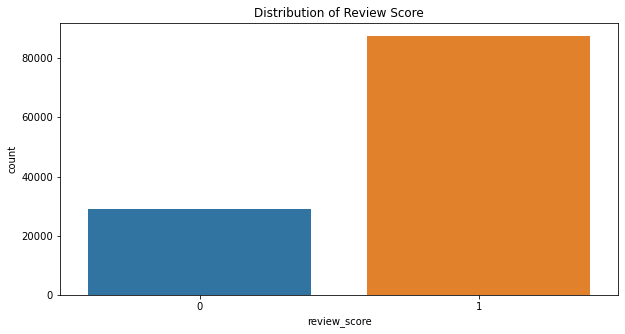

In [87]:
# converting reviews into 0 and 1 to make it binary classification problem
df_final['review_score'] = df_final['review_score'].apply(lambda x:1 if x>3 else 0)

#let us see the distribution now.
plt.figure(figsize=(10,5))
ax=sns.countplot(x="review_score", data=df_final)
plt.title('Distribution of Review Score')
plt.show()

###### Observation
The above plot show the distribution of the class labels(review_score) in the data set. From the plot, we can see that more than 50% of the data points belong to the class label 1 i.e positive class and rest of them to the negative class suggesting that we have class imbalanced data set.

In [27]:
# statistics of numerical features in the data set
df_final.describe()

order_item_id          price  freight_value  product_name_lenght  \
count  116581.000000  116581.000000  116581.000000        116581.000000   
mean        1.196953     120.751369      20.062550            48.766317   
std         0.701350     183.848421      15.845515            10.033728   
min         1.000000       0.850000       0.000000             5.000000   
25%         1.000000      39.900000      13.080000            42.000000   
50%         1.000000      74.900000      16.320000            52.000000   
75%         1.000000     134.900000      21.220000            57.000000   
max        21.000000    6735.000000     409.680000            76.000000   

       product_description_lenght  product_photos_qty  product_weight_g  \
count               116581.000000       116581.000000     116581.000000   
mean                   785.949331            2.204991       2115.548280   
std                    652.614023            1.717417       3783.573942   
min                      4.000000            1.000000          0.000000   
25%                    346.000000            1.000000        300.000000   
50%                    600.000000            1.000000        700.000000   
75%                    983.000000            3.000000       1800.000000   
max                   3992.000000           20.000000      40425.000000   

       product_length_cm  product_height_cm  product_width_cm   review_score  \
count      116581.000000      116581.000000     116581.000000  116581.000000   
mean           30.318534          16.645860         23.116872       0.750517   
std            16.222698          13.474688         11.758640       0.432716   
min             7.000000           2.000000          6.000000       0.000000   
25%            18.000000           8.000000         15.000000       1.000000   
50%            25.000000          13.000000         20.000000       1.000000   
75%            38.000000          20.000000         30.000000       1.000000   
max           105.000000         105.000000        118.000000       1.000000   

       payment_sequential  payment_installments  payment_value  \
count       116581.000000         116581.000000  116581.000000   
mean             1.093369              2.949614     172.910258   
std              0.727240              2.783798     267.622516   
min              1.000000              0.000000       0.000000   
25%              1.000000              1.000000      61.000000   
50%              1.000000              2.000000     108.190000   
75%              1.000000              4.000000     189.720000   
max             29.000000             24.000000   13664.080000   

       customer_zip_code_prefix  
count             116581.000000  
mean               35053.391556  
std                29817.864821  
min                 1003.000000  
25%                11310.000000  
50%                24315.000000  
75%                58600.000000  
max                99980.000000

###### Observation
We observe from above table that we have 12 useful numerical features except zip code, our target variable review score and order_item_id. let us observe the statistics of the price and freight value of an order. The maximum price of an order is 6735 while max freight went to around 410 Brazilian real. The average price of an order is around 120 Brazilian real and frieght value is around 20 Brazilian real. The order with minimum price of 0.85 Brazilian real have been made. Let us look at distribution of these features and see how they help in classifying the class labels and find other insights. 

#### 3.3.1 Univariate Analysis

<Figure size 432x288 with 0 Axes>

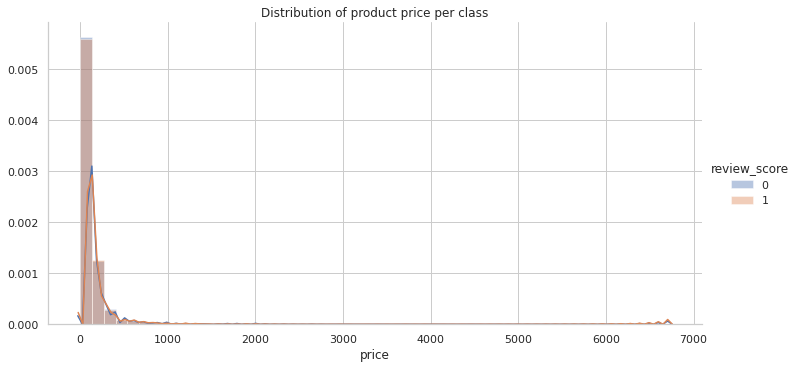

In [95]:
# https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
# plotting distributions of price per class
plt.figure()
sns.set_style("whitegrid")
ax = sns.FacetGrid(df_final, hue="review_score", height=5,aspect=2.0)
ax = ax.map(sns.distplot, "price").add_legend();
plt.title('Distribution of product price per class')
plt.show()

###### Observation
The distribution plot above shows the distribution of price for both the postive and negative classes. The overlap of both the distribution for positive and negative class suggests that it is not possible to classify them based only on price feature.

<Figure size 432x288 with 0 Axes>

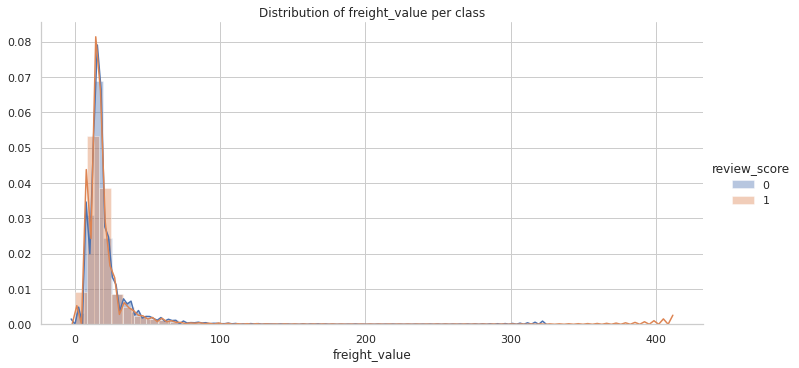

In [96]:
# plotting distributions of freight_value per class
plt.figure()
sns.set_style("whitegrid")
ax = sns.FacetGrid(df_final, hue="review_score", height=5,aspect=2.0)
ax = ax.map(sns.distplot, "freight_value").add_legend();
plt.title('Distribution of freight_value per class')
plt.show()

##### Observation
From the plot above titled `Distribution plot of freight value`, we observe that freight value is somewhat normally distributed but it too is overlapping for both the classes and hence provide much info in the classification.
Let us look at some more distributions and see if we get something important from any of them.

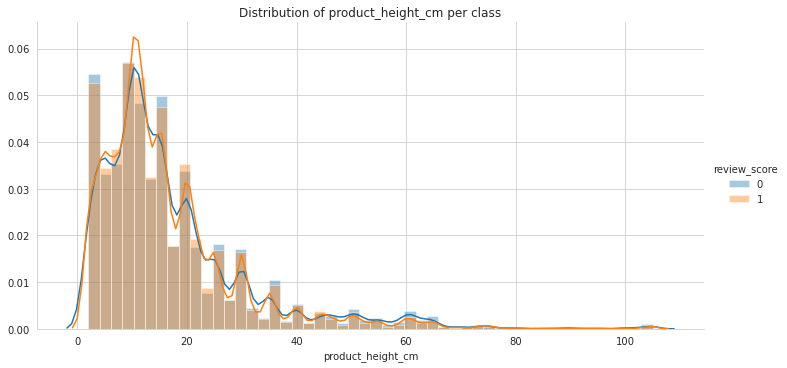

In [30]:
# plotting distributions of product_height_cm per class
sns.set_style("whitegrid")
ax = sns.FacetGrid(df_final, hue="review_score", height=5,aspect=2.0)
ax = ax.map(sns.distplot, "product_height_cm").add_legend();
plt.title('Distribution of product_height_cm per class')
plt.show()

<Figure size 432x288 with 0 Axes>

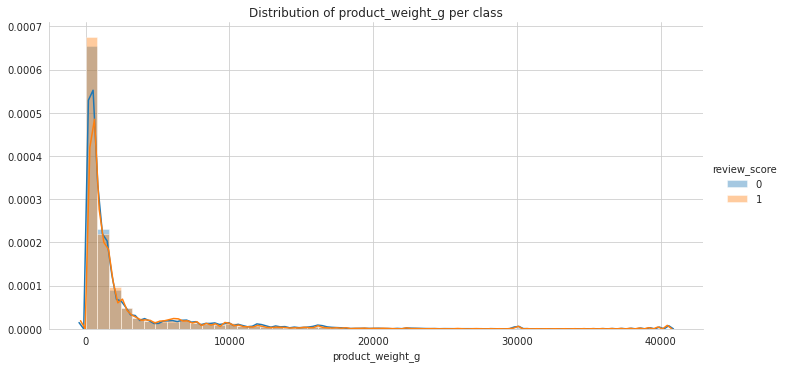

In [31]:
# distriution plot of product_weight_g
plt.figure()
sns.set_style("whitegrid")
ax = sns.FacetGrid(df_final, hue="review_score", height=5,aspect=2.0)
ax = ax.map(sns.distplot, "product_weight_g").add_legend();
plt.title('Distribution of product_weight_g per class')
plt.show()

<Figure size 432x288 with 0 Axes>

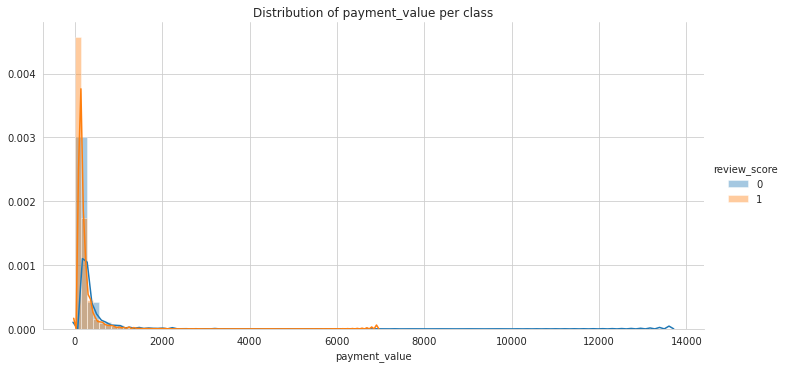

In [32]:
# distriution plot of payment_value
plt.figure()
sns.set_style("whitegrid")
ax = sns.FacetGrid(df_final, hue="review_score", height=5,aspect=2.0)
ax = ax.map(sns.distplot, "payment_value").add_legend();
plt.title('Distribution of payment_value per class')
plt.show()

##### Observation
From all the above univariate plots, we observed that almost all of them have overlapping distributions for the class labels. We can infer from that values of features lying in any range of their distribution have almost equal chance of gettig a postive or negative review. So, if that is the case how can we train the model to classify the positive and negative points if we cannot properly differentiate based on the features value(distribution).
So, let us go and do some bivariate analysis and see if we use more than one feature at time, can we come with something to classify these features.

#### 3.3.2 Bivariate Analysis

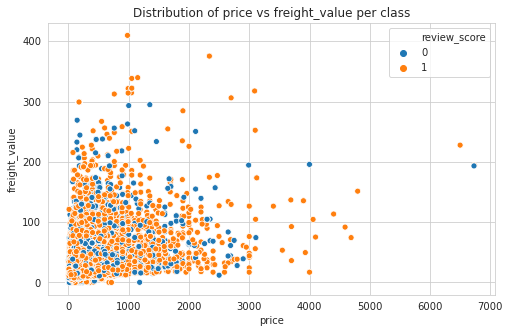

In [33]:
# Distribution of price vs freight_value per class
plt.figure(figsize=(8,5))
sns.set_style("whitegrid")
ax = sns.scatterplot(x='price',y='freight_value', data = df_final, hue="review_score")
plt.title('Distribution of price vs freight_value per class')
plt.show()

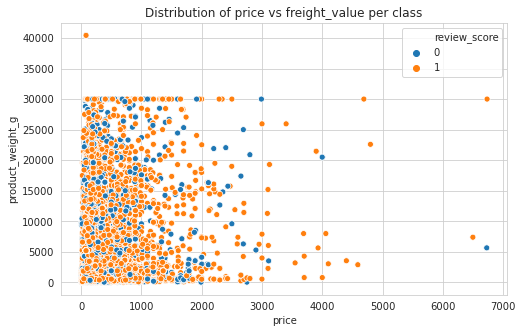

In [34]:
# Distribution of price vs freight_value per class
plt.figure(figsize=(8,5))
sns.set_style("whitegrid")
ax = sns.scatterplot(x='price',y='product_weight_g', data = df_final, hue="review_score")
plt.title('Distribution of price vs freight_value per class')
plt.show()

##### Observation
From the above two scatter plots titled `Distribution of price vs freight_value per class` and `Distribution of price vs freight_value per class` respectively, we tried to observe how are the features price and freight_value distributed for the class labels in the first plot. From the plots we observe that the points are mixed together for the both the classes suggesting us that algorithms like KNN might not be good in classifying these points. Therefore, we will observe the distribution of few more features with each other and see we find something more important.

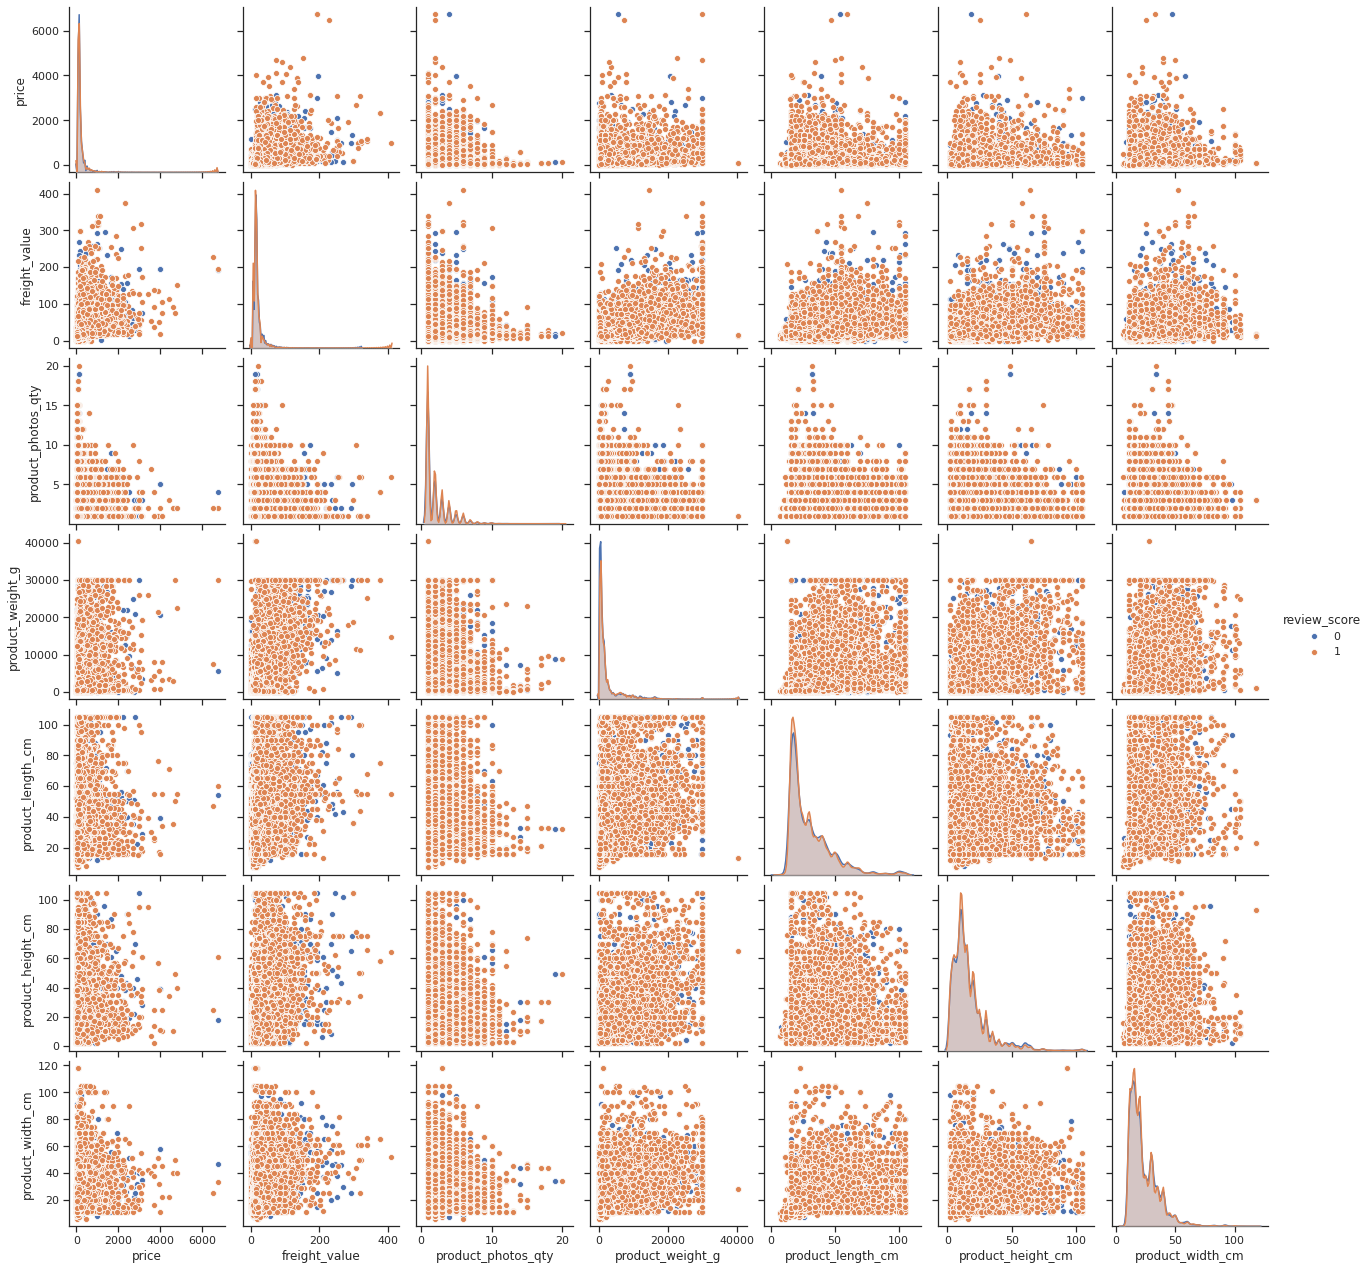

In [35]:
# https://seaborn.pydata.org/generated/seaborn.pairplot.html
# pair plot
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df_final[['price','freight_value','product_photos_qty','product_weight_g','product_length_cm',
                           'product_height_cm','product_width_cm', 'review_score']],hue='review_score')
# g.savefig("pairplot1.png")

##### Observation
In the pair plot above we see distribution of one feature with rest of them for each class labels. In the pair plot above, we can see some of the blue points from the orange points while in the univariate analysis we observed overlapping for amost all the cases. The distribution of freight value with all the other features like price, product length etc. shows that we might be able to classify positive and negative class using some non-linear techniques where the univariate analysis showed that it is nearly impossible to classify them based on some straight forward conditions or linear way. The results in the pair plot are better than univariate analysis but it is not promising to come any sure shot conclusion so, in next step we can engineer some new features on the data and try to see if we can find any relations td differentiate between positive and negative class.

#### 3.3.3 Analysis of Categorical Variable

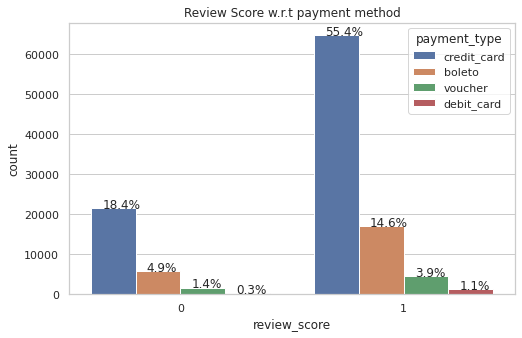

In [36]:
# count plot of payment type
# https://stackoverflow.com/questions/34615854/seaborn-countplot-with-normalized-y-axis-per-group
plt.figure(figsize=(8,5))
sns.set_style("whitegrid")
ax = sns.countplot(x="review_score", hue="payment_type", data=df_final)
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/len(df_final)),(p.get_x()+0.05, p.get_height()+5))
ax.set_title('Review Score w.r.t payment method')
plt.show()

##### Observation
The plot above shows the distributio of the categorical variable payment type w.r.t the review score. From the plot we observe the around 55% of the positive review given by customers have used credit card for the payments. Similarly, for negative review around 18% of customers made payment using credit cared while in the second postion we have boleto -  digital currency provided by the eCommerce site for their regular and registered customers.

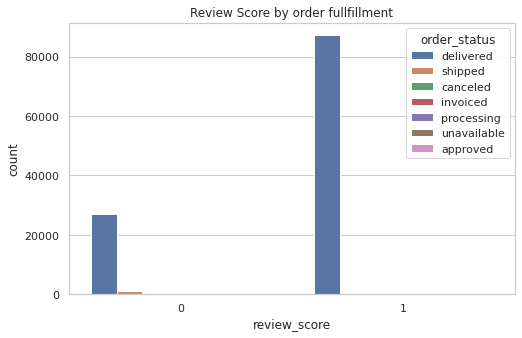

In [37]:
# count plot of order fullfillment
plt.figure(figsize=(8,5))
sns.set_style("whitegrid")
ax = sns.countplot(x="review_score", hue="order_status", data=df_final)
ax.set_title('Review Score by order fullfillment')
plt.show()

##### Observation
The plot above is a very simple plot which shows the distribution of review score given per order status of the order. From the plot we can observe that out of all the orders which got positive review 99% of them has been successfully delivered. 

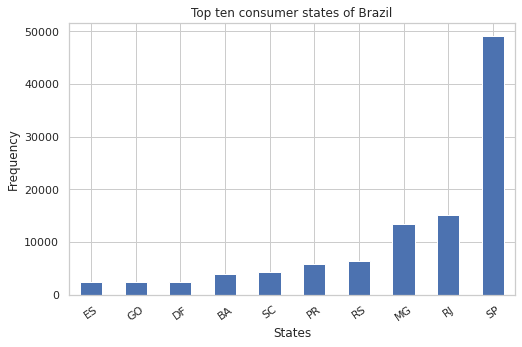

In [38]:
# Top 10 shopping states
plt.figure(figsize=(8,5))
sns.set_style("whitegrid")
ax = df_final.customer_state.value_counts().sort_values()[-10:].plot(kind='bar')
ax.set_title("Top ten consumer states of Brazil")
ax.set_xlabel("States")
plt.xticks(rotation=35)
ax.set_ylabel("Frequency")
plt.show()

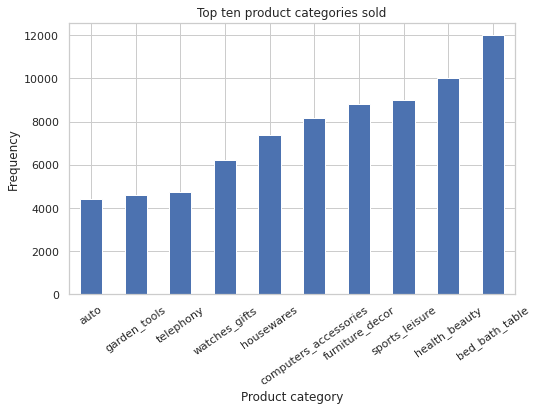

In [39]:
# top 10 products categories from which products have been sold
plt.figure(figsize=(8,5))
sns.set_style("whitegrid")
ax = df_final.product_category_name_english.value_counts().sort_values()[-10:].plot(kind='bar')
ax.set_title("Top ten product categories sold")
ax.set_xlabel("Product category")
plt.xticks(rotation=35)
ax.set_ylabel("Frequency")
plt.show()

##### Observation
In the above two plots titled `top 10 consumer states of Brazil` and `top 10 products categories sold` respectively we tried to observe the top ten states of the Brazil which shopped mostly online and the top ten product catefories from which products have been sold. In plot 1, we observe that around 45% of the consumers who shopped online is from the state **SP** while top 2 state consitute only around 15% of the total consumer shoppings of the data.

From the second plot, we observe that most of the products sold is from category bed_bath_table. The top two products category health_beauty and bed_bath_table constitutes around 20% of the sells of the site.

### 3.4 Feature Engineering
let us create some features and analyse them.
1. **Sellers Count**:- Number of sellers for each product as a feature.
2. **Products count**:- Number of products ordered in each order as a feature.
3. **Estimated Delivery Time(in number of days)**:- Gets the days between order approval and estimated delivery date. A customer might be unsatisfied if he is told that the estimated time is big.
4. **Actual Delivery Time**:- Gets the days between order approval and delivered customer date. A customer might be more satisfied if he gets the product faster.
5. **Difference in delivery days**:- The difference between the actual and estimated date. If negative was delivered early, if positive was delivered late. A customer might be more satisfied if the order arrives sooner than expected, or unhappy if he receives after the deadline
6. **Is Late**:- Binary variable indicating if the order was delivered after the estimated date.
7. **Average Product Value**:- Cheaper products might have lower quality, leaving customers unhappy.
8. **Total Order Value**:- If a customer expends more, he might expect a better order fulfilment.
9. **Order Freight Ratio**:- If a customer pays more for freight, he might expect a better service.
10. **Purchase Day of Week**:- Day of week on which purchase was made.
11. **is_reviewed**:- If the review comment is given or not.

In [88]:
# Finding number of sellers for each product as a feature
product_id = order_product_item_dataset.groupby('product_id').count()['seller_id'].index
seller_count = order_product_item_dataset.groupby('product_id').count()['seller_id'].values
product_seller_count = pd.DataFrame({'product_id':product_id,'sellers_count':seller_count})
product_seller_count.head()

product_id  sellers_count
0  00066f42aeeb9f3007548bb9d3f33c38              1
1  00088930e925c41fd95ebfe695fd2655              1
2  0009406fd7479715e4bef61dd91f2462              1
3  000b8f95fcb9e0096488278317764d19              2
4  000d9be29b5207b54e86aa1b1ac54872              1

In [89]:
# Finding number of products ordered in each order as a feature
order_id = order_product_item_dataset.groupby('order_id').count()['product_id'].index
pd_count = order_product_item_dataset.groupby('order_id').count()['product_id'].values
order_items_count = pd.DataFrame({'order_id':order_id,'products_count':pd_count})
order_items_count.head()

order_id  products_count
0  00010242fe8c5a6d1ba2dd792cb16214               1
1  00018f77f2f0320c557190d7a144bdd3               1
2  000229ec398224ef6ca0657da4fc703e               1
3  00024acbcdf0a6daa1e931b038114c75               1
4  00042b26cf59d7ce69dfabb4e55b4fd9               1

In [90]:
# Adding the seller count and products count feature to the final data set
df_final = pd.merge(df_final,product_seller_count,on='product_id')
df_final = pd.merge(df_final,order_items_count,on='order_id')

# converting date to datetime and extracting dates from the datetime columns in the data set
datetime_cols = ['order_purchase_timestamp','order_approved_at','order_delivered_customer_date','order_estimated_delivery_date']
for col in datetime_cols:
    df_final[col] = pd.to_datetime(df_final[col]).dt.date

In [91]:
# https://www.kaggle.com/andresionek/predicting-customer-satisfaction
# calculating estimated delivery time
df_final['estimated_delivery_time'] = (df_final['order_estimated_delivery_date'] - df_final['order_approved_at']).dt.days

# calculating actual delivery time
df_final['actual_delivery_time'] = (df_final['order_delivered_customer_date'] - df_final['order_approved_at']).dt.days

# calculating diff_in_delivery_time
df_final['diff_in_delivery_time'] = df_final['estimated_delivery_time'] - df_final['actual_delivery_time']

# finding if delivery was lare
df_final['on_time_delivery'] = df_final['order_delivered_customer_date'] < df_final['order_estimated_delivery_date']
df_final['on_time_delivery'] = df_final['on_time_delivery'].astype('int')

# calculating mean product value
df_final['avg_product_value'] = df_final['price']/df_final['products_count']

# finding total order cost
df_final['total_order_cost'] = df_final['price'] + df_final['freight_value']

# calculating order freight ratio
df_final['order_freight_ratio'] = df_final['freight_value']/df_final['price']

# finding the day of week on which order was made
df_final['purchase_dayofweek'] = pd.to_datetime(df_final['order_purchase_timestamp']).dt.dayofweek

# adding is_reviewed where 1 is if review comment is given otherwise 0.
df_final['is_reviewed'] = (df_final['review_comment_message'] != 'no_review').astype('int')

#### 3.4.1 Dropping date columns and id columns like seller_id, order_id etc.

In [92]:
df_final.drop(columns=['order_id', 'order_item_id', 'product_id', 'seller_id','shipping_limit_date','customer_id',
                       'order_purchase_timestamp', 'order_approved_at', 'order_delivered_customer_date', 'customer_state',
                       'order_estimated_delivery_date','customer_unique_id', 'customer_city','customer_zip_code_prefix'],
              axis=1,inplace=True)

In [93]:
# Final data set after feature creation and removing of irrelevant features
# df_final.to_csv('olist_final.csv',index=False)
df_final.head()

price  freight_value  product_name_lenght  product_description_lenght  \
0   58.9          13.29                 58.0                       598.0   
1   55.9          17.96                 58.0                       598.0   
2   64.9          18.33                 58.0                       598.0   
3   58.9          16.17                 58.0                       598.0   
4   58.9          13.29                 58.0                       598.0   

   product_photos_qty  product_weight_g  product_length_cm  product_height_cm  \
0                 4.0             650.0               28.0                9.0   
1                 4.0             650.0               28.0                9.0   
2                 4.0             650.0               28.0                9.0   
3                 4.0             650.0               28.0                9.0   
4                 4.0             650.0               28.0                9.0   

   product_width_cm product_category_name_english  ...  products_count  \
0              14.0                    cool_stuff  ...               1   
1              14.0                    cool_stuff  ...               1   
2              14.0                    cool_stuff  ...               1   
3              14.0                    cool_stuff  ...               1   
4              14.0                    cool_stuff  ...               1   

  estimated_delivery_time actual_delivery_time  diff_in_delivery_time  \
0                      16                    7                      9   
1                      27                   14                     13   
2                      20                   17                      3   
3                      24                    8                     16   
4                      22                   14                      8   

  on_time_delivery  avg_product_value  total_order_cost  order_freight_ratio  \
0                1               58.9             72.19             0.225637   
1                1               55.9             73.86             0.321288   
2                1               64.9             83.23             0.282435   
3                1               58.9             75.07             0.274533   
4                1               58.9             72.19             0.225637   

   purchase_dayofweek  is_reviewed  
0                   2            1  
1                   2            1  
2                   4            1  
3                   1            0  
4                   3            0  

[5 rows x 28 columns]

#### 3.4.2 Analysis of the engineered features
#### 3.4.2.1 Understanding statistics of the engineered features

In [33]:
# describe the data set
df_final[['sellers_count', 'products_count','estimated_delivery_time', 'actual_delivery_time','diff_in_delivery_time', 
          'avg_product_value','total_order_cost', 'order_freight_ratio']].describe()

sellers_count  products_count  estimated_delivery_time  \
count  116581.000000   116581.000000            116581.000000   
mean       36.179455        1.393855                23.990007   
std        81.397623        1.112939                 8.905054   
min         1.000000        1.000000                -6.000000   
25%         2.000000        1.000000                19.000000   
50%         7.000000        1.000000                23.000000   
75%        26.000000        1.000000                29.000000   
max       527.000000       21.000000               154.000000   

       actual_delivery_time  diff_in_delivery_time  avg_product_value  \
count         116581.000000          116581.000000      116581.000000   
mean              12.192699              11.797308         110.351657   
std                9.649015              10.200133         181.484738   
min               -7.000000            -188.000000           0.057143   
25%                6.000000               7.000000          29.950000   
50%               10.000000              12.000000          61.900000   
75%               15.000000              17.000000         122.900000   
max              208.000000             147.000000        6735.000000   

       total_order_cost  order_freight_ratio  
count     116581.000000        116581.000000  
mean         140.813919             0.321906  
std          190.993525             0.350780  
min            6.080000             0.000000  
25%           55.370000             0.134928  
50%           92.030000             0.232254  
75%          157.790000             0.393538  
max         6929.310000            26.235294

##### Observation
Let us observe the statistics of the features we created.
1. The sellers count for total products ordered in a order have minimum number of sellers as 1 while maximum sellers of 527.
2. The numer of products ordered in a single order have maximum value as 21 and minimum as 1.
3. The maximum estimated delivery time is 154 days with mean value of 23 days.
4. The maximum actual delivery time is 208 days and with average delivery time of 12 days.
5. Average total order cost 140 brazilian real with minimum value of 6 real.

#### 3.4.3 Analysis

<Figure size 432x288 with 0 Axes>

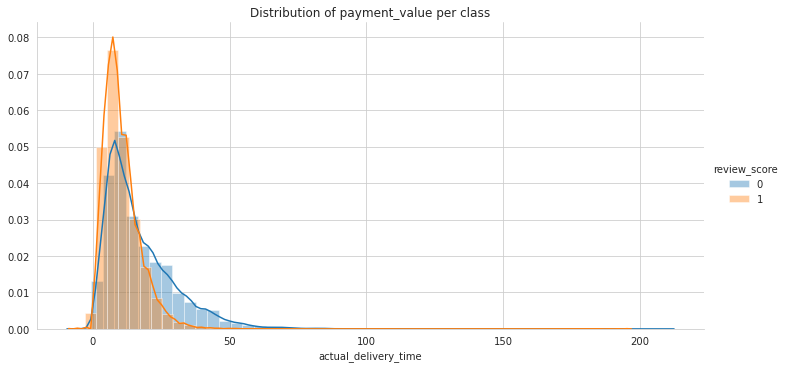

In [384]:
# distribution plot of actual delivery time
plt.figure()
sns.set_style("whitegrid")
ax = sns.FacetGrid(df_final, hue="review_score", height=5,aspect=2.0)
ax = ax.map(sns.distplot, "actual_delivery_time").add_legend();
plt.title('Distribution of payment_value per class')
plt.show()

##### Observation
For all the univariate distribution up until now, we have observed complete overlap for both classed while in the above plot we can see some difference in distributions for postive and negative classed. The negative class is more skewed to right than the positive class inferring that the increase in delivery time affects the review score.

<Figure size 432x288 with 0 Axes>

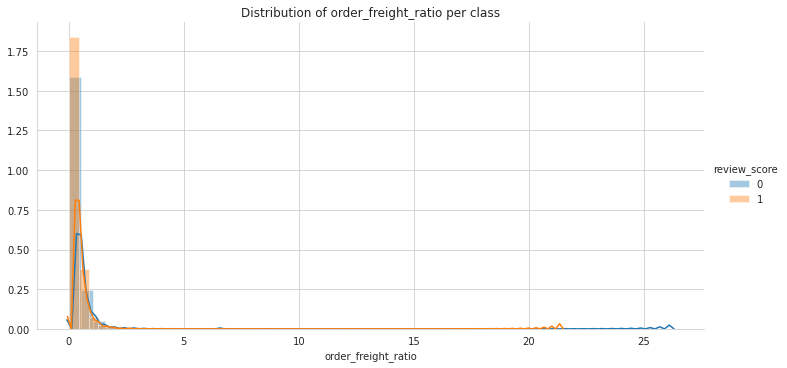

In [35]:
# distribution plot of payment value
plt.figure()
sns.set_style("whitegrid")
ax = sns.FacetGrid(df_final, hue="review_score", height=5,aspect=2.0)
ax = ax.map(sns.distplot, "order_freight_ratio").add_legend();
plt.title('Distribution of order_freight_ratio per class')
plt.show()

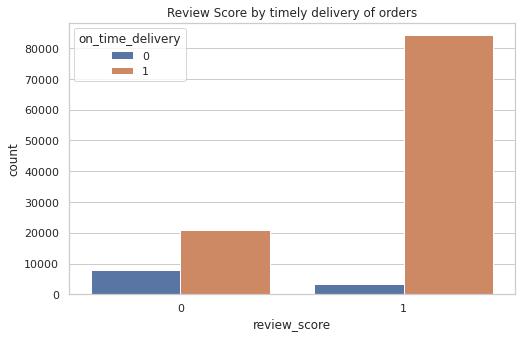

In [294]:
# distribution review by on time delivery
plt.figure(figsize=(8,5))
sns.set_style("whitegrid")
ax = sns.countplot(x="review_score", hue="on_time_delivery", data=df_final)
ax.set_title('Review Score by timely delivery of orders')
plt.show()

###### Observation
From plot titled `distribution of order freight ratio` we observe overlap for both the classes. So, we will go for bivariate/multivariate analysis for this features.
Also, from the plot titled `review score by order fullfillment` we observe that out of all the review classified as positive 90% of them were delivered on or before time to the customer.

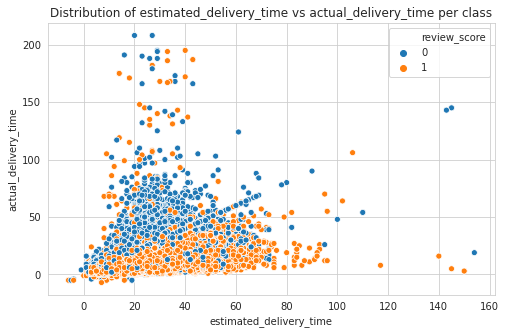

In [106]:
# Distribution of price vs freight_value per class
plt.figure(figsize=(8,5))
sns.set_style("whitegrid")
ax = sns.scatterplot(x='estimated_delivery_time',y='actual_delivery_time', data = df_final, hue="review_score")
plt.title('Distribution of estimated_delivery_time vs actual_delivery_time per class')
plt.show()

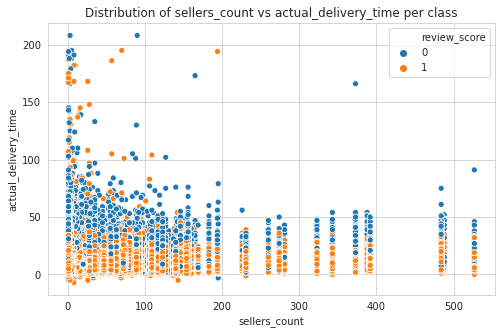

In [107]:
# Distribution of price vs freight_value per class
plt.figure(figsize=(8,5))
sns.set_style("whitegrid")
ax = sns.scatterplot(x='sellers_count',y='actual_delivery_time', data = df_final, hue="review_score")
plt.title('Distribution of sellers_count vs actual_delivery_time per class')
plt.show()

###### Observation
From the univariate analysis, we have seen that actual delivery time's distibution is partially overlapping for both the class lables and we cannot derive any certain rule to classify them based on the actual delivery time. So, we plotted the above scatter plots to see if we can derive any relation with more than one features. From the plots above we observe that we can separate the blue points from the orange points with a linear line with some errors. Thus, now we can say that we can derive some linear relation to classify them. let us verify our observation from below pair plot.

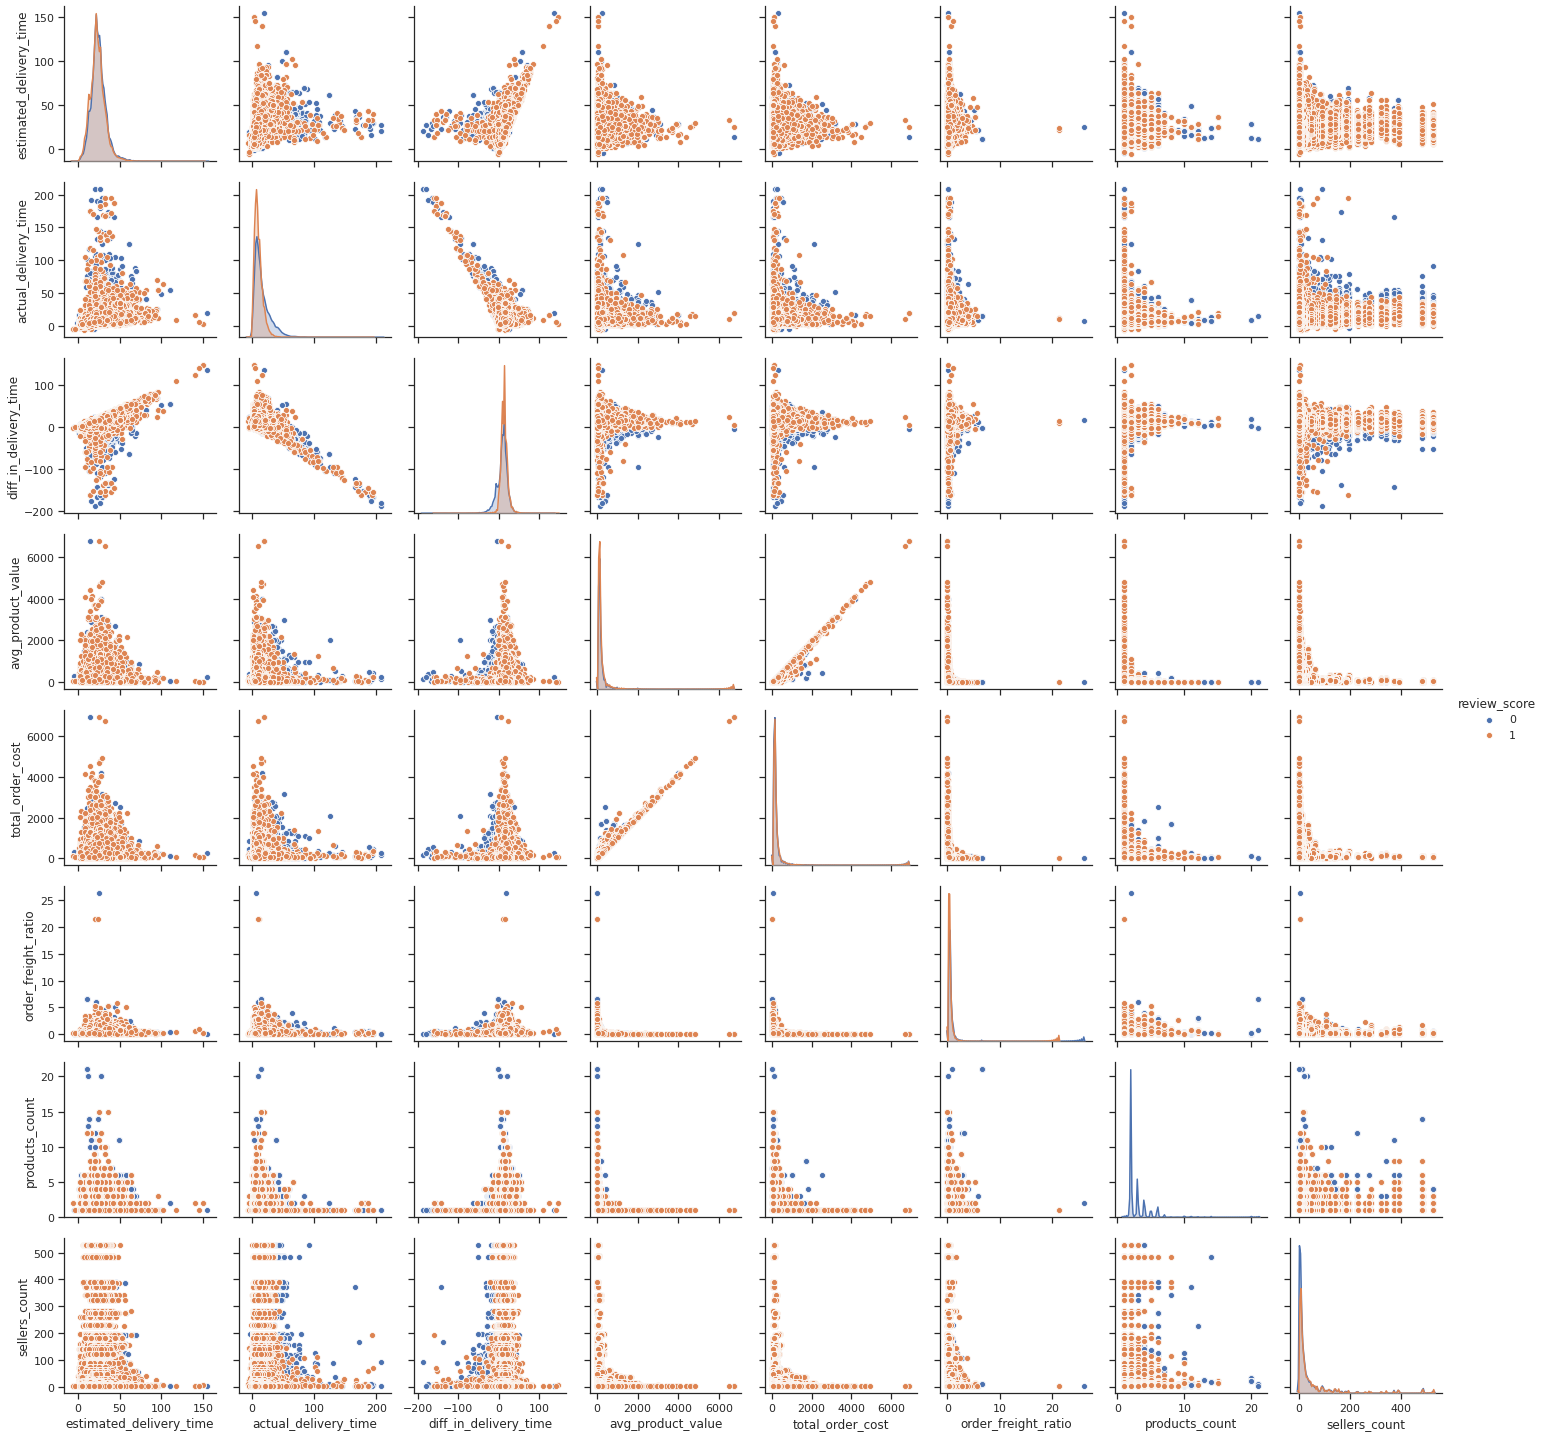

In [89]:
# pair plot
feat = ['estimated_delivery_time','actual_delivery_time', 'diff_in_delivery_time','avg_product_value', 
           'total_order_cost', 'order_freight_ratio','products_count','sellers_count','review_score']
sns.set(style="ticks", color_codes=True)
pp = sns.pairplot(df_final[feat],hue='review_score')
# pp.savefig("pairplot2.png")

###### Observation
The Pairplot above is the bivariate analysis of 8 newly engineered features like sellers count, product count, delivery time in days etc. From the above plot we observe that actual delivery time vs sellers count plot separates the positive and negative classed more visibly than others. We can say that the number of sellers available and the actual delivery time affects the review score either postively or negatively which we can see in details in the correlation analysis of the features.

## 4. Observation on EDA and FE
Let us gather what we have observed and learned so far from the data.
1. The class label is not balanced.
2. It is impossible to differentiate the classes based on any single feature.
3. The numerical feature like price and freight value have skewed distribution suggesting the presence of high boundary values.
4. The freight_value vs product photo qty plot shows good result for classifying the class labels.
5. The most used payment method is credit card.
6. We also found that aroudn 45% of the consumers belong to single state and most shopped product category among them is bed,bath,table,health and beauty.
7. As observed in the analysis, 10 different features were  created referencing some features in the data like:- products ccount, sellers count, total order cost, actual delivery time etc. and the previous features like delivery date, product_id etc. is dropped.
8. we learnt that the feature actual delivery time provide partial differentiation between positive and negative class.
9. The scatter plots plotted in the first part of thge analysis do not show any significant results in classifying the positive and negative points while the scatter plots in the second analysis after feature engineering shows significant difference in the positive and negative class points as evident from plot `Distribution of sellers_count vs actual_delivery_time per class`.
10. The pair plot shows that with these features can classify the postive class from negative class with some non linear transformation. 
11. As evident from scatter plots and pair plots , it is clear that linear algorithms or KNN might not be good choice in classifying these points. But, atleast we learnt that with thes set of features we can classify them into two classes.

## 5. Data Preparation
### 5.1 Getting Numerical and categorical features

In [94]:
# selecting features 
# numerical features
num_feat = ['price', 'freight_value', 'product_name_lenght','product_description_lenght', 'product_photos_qty',
           'product_weight_g','product_length_cm', 'product_height_cm', 'product_width_cm','sellers_count', 
           'products_count', 'payment_sequential','payment_installments', 'payment_value','on_time_delivery', 
           'estimated_delivery_time','actual_delivery_time', 'diff_in_delivery_time','avg_product_value', 'purchase_dayofweek',
           'total_order_cost', 'order_freight_ratio','is_reviewed']

# categorical features
cat_feat = ['review_comment_message','product_category_name_english','order_status', 'payment_type']

In [116]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy='median')
si.fit(df_final[num_feat])
df_final[num_feat] = si.transform(df_final[num_feat])

In [95]:
# checking values of categorical features    
print("order Status: ",df_final.order_status.value_counts())
print("----------------------------------------------------------------------------")
print("Payment type: ",df_final.payment_type.value_counts())

order Status:  delivered      114067
shipped          1225
canceled          553
invoiced          364
processing        362
unavailable         7
approved            3
Name: order_status, dtype: int64
----------------------------------------------------------------------------
Payment type:  credit_card    86012
boleto         22692
voucher         6211
debit_card      1666
Name: payment_type, dtype: int64


We see that the we have two types and 3 types of data in on_time_delivery and payment_type column in the data. so, we will go with label encoding for these data rather than one hot encoding. Let us look at the review comments feature.

In [96]:
df_final['review_comment_message'][:10]

0       Perfeito, produto entregue antes do combinado.
1    lannister como sempre, entregou certinho e den...
2                                carrinho muito bonito
3                                            no_review
4                                            no_review
5                                            no_review
6    Muito bom chegou bem antes do prazo, produto d...
7                                            no_review
8                                            no_review
9                         o carrinho veio com defeito.
Name: review_comment_message, dtype: object

In [97]:
# https://www.aclweb.org/anthology/W17-6615

def process_data(texts):
    
    processed_text = []
    
    portuguese_stopwords = stopwords.words('portuguese') # portugese language stopwords
    stemmer = RSLPStemmer() # portugese language stemmer
    
    links = 'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+' # check for hyperlinks
    dates = '([0-2][0-9]|(3)[0-1])(\/|\.)(((0)[0-9])|((1)[0-2]))(\/|\.)\d{2,4}' # check for dates
    currency = '[R]{0,1}\$[ ]{0,}\d+(,|\.)\d+' # check for currency symbols
    
    for text in tqdm(texts):
        text = re.sub('[\n\r]', ' ', text) # remove new lines
        text = re.sub(links, ' URL ', text) # remove hyperlinks
        text = re.sub(dates, ' ', text) # remove dates
        text = re.sub(currency, ' dinheiro ', text) # remove currency symbols
        text = re.sub('[0-9]+', ' numero ', text) # remove digits
        text = re.sub('([nN][ãÃaA][oO]|[ñÑ]| [nN] )', ' negação ', text) # replace no with negative
        text = re.sub('\W', ' ', text) # remove extra whitespaces
        text = re.sub('\s+', ' ', text) # remove extra spaces
        text = re.sub('[ \t]+$', '', text) # remove tabs etc.
        text = ' '.join(e for e in text.split() if e.lower() not in portuguese_stopwords) # remove stopwords
#         text = ' '.join(stemmer.stem(e.lower()) for e in text.split()) # stemming the words
        processed_text.append(text.lower().strip())
        
    return processed_text

We see that this is a text feature. So, let us process the texts before we go for encoding of the features. The function below will help us in processing the text and make it ready for use in the model.

In [98]:
processed_text = process_data(df_final['review_comment_message'])

100%|██████████| 116581/116581 [00:03<00:00, 30645.21it/s]


In [99]:
df_final['review_comment_message'] = processed_text
# nao_reveja = no_review in portugese
df_final['review_comment_message'] = df_final['review_comment_message'].replace({'no_review':'nao_reveja'}) 
# df_final.to_csv('olist_final.csv',index=False)

In [100]:
df_final['review_comment_message'].iloc[:10]

0            perfeito produto entregue antes combinado
1    lannister sempre entregou certinho dentro praz...
2                                      carrinho bonito
3                                           nao_reveja
4                                           nao_reveja
5                                           nao_reveja
6    bom chegou bem antes prazo produto ótima quali...
7                                           nao_reveja
8                                           nao_reveja
9                                carrinho veio defeito
Name: review_comment_message, dtype: object

In [101]:
# Encoding categorical variable
df_final['payment_type'] = df_final['payment_type'].replace({'credit_card':1,'boleto':2,'voucher':3,'debit_card':4})

#### 4.2 Splitting data into test and train

In [102]:
# separating the target variable
y = df_final['review_score']
X = df_final.drop(labels='review_score',axis=1)

# train test 80:20 split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=25)
print("Train data: ",X_train.shape,y_train.shape)
print("Train data: ",X_test.shape,y_test.shape)

Train data:  (93264, 27) (93264,)
Train data:  (23317, 27) (23317,)


#### 4.3 Encoding categorical features
#### 4.3.1 Encoding categorical feature order_status

In [103]:
# encoding feature order status
vect = CountVectorizer()
vect.fit(X_train['order_status'])
training_os = vect.transform(X_train['order_status'])
test_os = vect.transform(X_test['order_status'])


print("training product category: ",training_os.shape)
print("test product category: ",test_os.shape)

training product category:  (93264, 7)
test product category:  (23317, 7)


#### 4.3.2 Encoding categorical feature product category

In [104]:
# encoding product category
cv = CountVectorizer()
cv.fit(X_train['product_category_name_english'])
training_pc = cv.transform(X_train['product_category_name_english'])
test_pc = cv.transform(X_test['product_category_name_english'])

print("training product category: ",training_pc.shape)
print("test product category: ",test_pc.shape)

training product category:  (93264, 70)
test product category:  (23317, 70)


#### 4.3.2 Encoding categorical feature review_comment_message

In [105]:
# # Word2vec encoding
# # https://radimrehurek.com/gensim/models/word2vec.html
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec

path = get_tmpfile("word2vec.model")

texts = [x.split(' ') for x in df_final['review_comment_message']]

w2vmodel = Word2Vec(texts, size=300, window=5, min_count=1, workers=4)
w2vmodel.save("word2vec.model")

w2vmodel = Word2Vec.load("word2vec.model")
w2vmodel.train(texts, total_examples=len(texts), epochs=10)

w2vmodel.wv['nao_reveja'].shape  # numpy vector of a word

(300,)

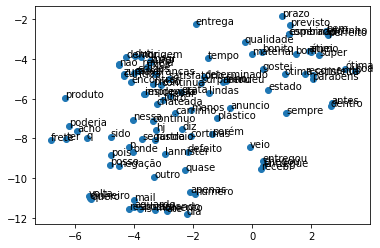

In [48]:
words =  list(w2vmodel.wv.vocab.keys())
vectors = [w2vmodel.wv[word] for word in words]

from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

Y = tsne.fit_transform(vectors[:100])
plt.scatter(Y[:, 0], Y[:, 1])
for label, x, y in zip(words, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords="offset points")
plt.show()

In [47]:
# http://nilc.icmc.usp.br/nilc/index.php/repositorio-de-word-embeddings-do-nilc#
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f.readlines()[1:]):
        splitLine = line.split(' ')
        word = splitLine[0]
        embedding = np.asarray(splitLine[1:], "float32")#np.array([float(0) if val=='0,0' else float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model

embeddings = loadGloveModel('glove_s300.txt')

Loading Glove Model


100%|██████████| 929605/929605 [01:06<00:00, 14051.94it/s]


Done. 929605  words loaded!


In [106]:
def tfidfWord2Vector(text,glove_words,tfidf_words,tf_values):
    # average Word2Vec
    # compute average word2vec for each review.
    tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
    for sentence in tqdm(text): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        tf_idf_weight =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if (word in glove_words) and (word in tfidf_words):
                vec = w2vmodel.wv[word] # embeddings[word] 
                # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = tf_values[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
                vector += (vec * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        if tf_idf_weight != 0:
            vector /= tf_idf_weight
        tfidf_w2v_vectors.append(vector)
    tfidf_w2v_vectors = np.asarray(tfidf_w2v_vectors)
    
    return tfidf_w2v_vectors

In [107]:
# encoding review comment message using Tfidf weighted W2V
tfidf = TfidfVectorizer()
tfidf.fit(X_train['review_comment_message'])
# pickle.dump(tfidf,open('tfidf_review_comments.pkl','wb'))

# we are converting a dictionary with word as a key, and the idf as a value
tf_values = dict(zip(tfidf.get_feature_names(), list(tfidf.idf_)))
tfidf_words = set(tfidf.get_feature_names())
glove_words = list(w2vmodel.wv.vocab.keys()) # list(embeddings.keys())

tfidf_w2v_vectors_train = tfidfWord2Vector(X_train['review_comment_message'].values,glove_words,tfidf_words,tf_values)
tfidf_w2v_vectors_test = tfidfWord2Vector(X_test['review_comment_message'].values,glove_words,tfidf_words,tf_values)

100%|██████████| 23317/23317 [00:02<00:00, 10712.69it/s]


In [108]:
tfidf_w2v_vectors_train.shape

(93264, 300)

In [109]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
vocab = list()
for x in df_final['review_comment_message']:
    vocab.extend(x.split())
vocab = set(vocab)
word_index = {word:i+1 for i,word in enumerate(vocab)}
# pickle.dump(word_index,open('word_index.pkl','wb'))
vocab_size = len(word_index)+1
# integer encode the documents
X_train_encoded_text = []
for x in X_train['review_comment_message']:
    X_train_encoded_text.append([word_index[w] for w in x.split()])
    
X_test_encoded_text = []
for y in X_test['review_comment_message']:
    X_test_encoded_text.append([word_index[w] for w in y.split()])
    

# pad documents to a max length of 122 words as 95 percentile is 122
max_length = 122
X_train_padded_text = pad_sequences(X_train_encoded_text, maxlen=max_length, padding='post')
X_test_padded_text = pad_sequences(X_test_encoded_text, maxlen=max_length, padding='post')


print(X_train_padded_text.shape,X_test_padded_text.shape)

(93264, 122) (23317, 122)


In [110]:
# creating embedding matrix
embedding_matrix = np.zeros((vocab_size, 300))
for word,i in word_index.items():
    embedding_vector = w2vmodel.wv[word]
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

print(embedding_matrix.shape)
# pickle.dump(embedding_matrix,open('embedding_matrix.pkl','wb'))

(15060, 300)


#### 4.4 Encoding numerical features

In [111]:
# encoding numerical features
for i in num_feat:
    normalizer = Normalizer()
    normalizer.fit(X_train[i].values.reshape(1,-1))
#     pickle.dump(normalizer,open(i+'.pkl','wb'))
    X_train[i] = normalizer.transform(X_train[i].values.reshape(1,-1))[0]
    X_test[i] = normalizer.transform(X_test[i].values.reshape(1,-1))[0]

In [112]:
# dropping categorical features

X_train = X_train.drop(labels=['review_comment_message','product_category_name_english','order_status'],axis=1)
X_test = X_test.drop(labels=['review_comment_message','product_category_name_english','order_status'],axis=1)

print(X_train.shape,X_test.shape)

(93264, 24) (23317, 24)


#### 4.5 Merging all the features

In [113]:
# merging our encoded categorical features with rest of the data 
X_train_merge = hstack((X_train, training_pc, training_os, tfidf_w2v_vectors_train))
X_test_merge = hstack((X_test, test_pc, test_os, tfidf_w2v_vectors_test))

print("Train shape:",X_train_merge.shape)
print("Test shape:",X_test_merge.shape)

Train shape: (93264, 401)
Test shape: (23317, 401)


In [114]:
# merging our encoded categorical features with rest of the data 
X_train_other = hstack((X_train, training_pc, training_os))
X_test_other = hstack((X_test, test_pc, test_os))

print("Train shape:",X_train_other.shape)
print("Test shape:",X_test_other.shape)

Train shape: (93264, 101)
Test shape: (23317, 101)


## 6. Model Selection
### 6.1 Logistic Regression

In [115]:
def confusion_matrices_plot(y_real, y_pred, y_test,y_test_pred):
    # representing confusion matric in heatmap format
    # https://seaborn.pydata.org/generated/seaborn.heatmap.html
    cmap=sns.light_palette("brown")
    C1 = confusion_matrix(y_real,y_pred)
    C2 = confusion_matrix(y_test,y_test_pred)
    
    fig,ax = plt.subplots(1, 2, figsize=(15,5))
    ax1 = sns.heatmap(C1, annot=True, cmap=cmap, fmt=".2f", ax = ax[0])
    ax1.set_xlabel('Predicted Class')
    ax1.set_ylabel('Original Class')
    ax1.set_title("Train Confusion matrix")

    ax2 = sns.heatmap(C2, annot=True, cmap=cmap, fmt=".2f", ax = ax[1])
    ax2.set_xlabel('Predicted Class')
    ax2.set_ylabel('Original Class')
    ax2.set_title("Test Confusion matrix")
    
    plt.show()

Alpha =  0.001 Train Score 0.9124422085989531 test Score 0.9123968736430742
Alpha =  0.01 Train Score 0.9084697069365947 test Score 0.9089150930726047
Alpha =  0.1 Train Score 0.9020531496582482 test Score 0.9024370923877169
Alpha =  1 Train Score 0.8750785629886618 test Score 0.8759789478985671
Alpha =  10 Train Score 0.8575576765213981 test Score 0.8575488802861763
Alpha =  100 Train Score 0.8574841203241476 test Score 0.8574858514834505
Alpha =  1000 Train Score 0.857478868063212 test Score 0.8574858514834505


Text(0.5, 1.0, 'Alpha vs Score')

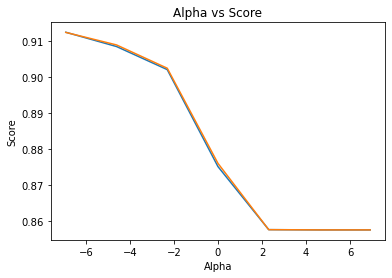

In [116]:
# Training Logistic regression model and chekcing f1 score metric
alpha = [0.001,0.01,0.1,1,10,100,1000]
train_scores = [] # store train scores
test_scores = [] # store test scores

for i in alpha:
    lr = SGDClassifier(loss='log', penalty='l2', alpha=i, n_jobs=-1, random_state=25)
    lr.fit(X_train_merge,y_train)
    train_sc = f1_score(y_train,lr.predict(X_train_merge))
    test_sc = f1_score(y_test,lr.predict(X_test_merge))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Alpha = ',i,'Train Score',train_sc,'test Score',test_sc)
    
# plotting the scores vs parameters
plt.plot(np.log(alpha),train_scores,label='Train Score')
plt.plot(np.log(alpha),test_scores,label='Test Score')
plt.xlabel('Alpha')
plt.ylabel('Score')
plt.title('Alpha vs Score')

In [58]:
# Parameter tuning of Logistic regression using RandomisedSearch CV technique
sgd = SGDClassifier(loss='log', n_jobs=-1, random_state=25)
 
prams={ 'alpha': [0.001,0.01,0.1,1,10,100,1000] }

random_cfl1 = RandomizedSearchCV(sgd,param_distributions=prams,verbose=10,scoring='f1',n_jobs=-1,random_state=25,
                               return_train_score=True)
random_cfl1.fit(X_train_merge,y_train)

print('mean test scores',random_cfl1.cv_results_['mean_test_score'])
print('mean train scores',random_cfl1.cv_results_['mean_train_score'])

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  24 out of  35 | elapsed:    2.5s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  28 out of  35 | elapsed:    2.8s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  32 out of  35 | elapsed:    2.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    3.0s finished


mean test scores [0.91641432 0.9058485  0.88340304 0.85825177 0.85747887 0.85747887
 0.85747887]
mean train scores [0.91730502 0.9061073  0.88341938 0.85826358 0.85747887 0.85747887
 0.85747887]


In [59]:
# printing best parameters and score
print("Best Parameters: ",random_cfl1.best_params_)
print("Best Score: ",random_cfl1.best_score_)

Best Parameters:  {'alpha': 0.001}
Best Score:  0.9164143150761636


In [102]:
# Fitting LogisticRegression mpdel on best parameters
sgd = SGDClassifier(loss='log', alpha=0.001, n_jobs=-1, random_state=25)
sgd.fit(X_train_merge,y_train)
pickle.dump(sgd,open('models/logistic.pkl','wb'))

y_train_pred = sgd.predict(X_train_merge)
y_test_pred = sgd.predict(X_test_merge)

# printing train and test scores 
print('Train f1 score: ',f1_score(y_train,y_train_pred))
print('Test f1 score: ',f1_score(y_test,y_test_pred))

Train f1 score:  0.9124422085989531
Test f1 score:  0.9123968736430742


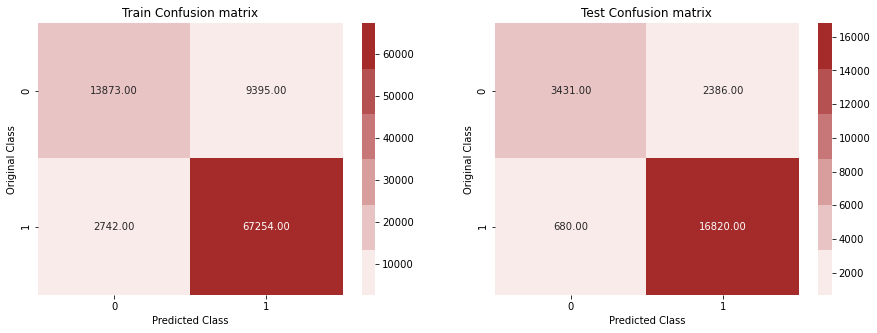

In [110]:
confusion_matrices_plot(y_train,y_train_pred,y_test,y_test_pred)

###### Observation
The first model trained is LogisticRegression and f1-score is used as the metric. We used randomisedsearch cross validation technique to tune the parametrs of the model. The best parameter we got is alpha=0.01 with f1-score of approx 0.91.The score looks quite good in one look so, to observe closely we plotted confusion matrix. Looking at the confusion matrix, we observe that TP values of model is very good while TN values are struggling with FNs. So, let us train some different models and observe the difference.  

### 6.2 Linear SVM

Alpha =  0.001 Train Score 0.9174639186529631 test Score 0.9171168221749332
Alpha =  0.01 Train Score 0.9159627773801002 test Score 0.9152422427871529
Alpha =  0.1 Train Score 0.9107513658448078 test Score 0.9104108410410842
Alpha =  1 Train Score 0.8950863902869299 test Score 0.8961365818219558
Alpha =  10 Train Score 0.8763121460037758 test Score 0.8770824407087229
Alpha =  100 Train Score 0.8708619817524401 test Score 0.8710742148429685
Alpha =  1000 Train Score 0.8581608998025242 test Score 0.8579627676534792


Text(0.5, 1.0, 'Alpha vs Score')

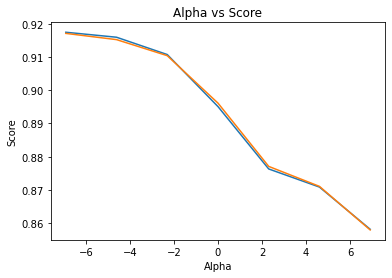

In [111]:
# Training Logistic regression model and chekcing f1 score metric
alpha = [0.001,0.01,0.1,1,10,100,1000]
train_scores = [] # store train scores
test_scores = [] # store test scores

for i in alpha:
    lr = SGDClassifier(loss='hinge', penalty='l2', alpha=i, n_jobs=-1, random_state=25)
    lr.fit(X_train_merge,y_train)
    train_sc = f1_score(y_train,lr.predict(X_train_merge))
    test_sc = f1_score(y_test,lr.predict(X_test_merge))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Alpha = ',i,'Train Score',train_sc,'test Score',test_sc)
    
# plotting the scores vs parameters
plt.plot(np.log(alpha),train_scores,label='Train Score')
plt.plot(np.log(alpha),test_scores,label='Test Score')
plt.xlabel('Alpha')
plt.ylabel('Score')
plt.title('Alpha vs Score')

In [68]:
# Parameter tuning of Logistic regression using RandomisedSearch CV technique
sgd = SGDClassifier(loss='hinge', n_jobs=-1, random_state=25)
 
prams={ 'alpha': [0.001,0.01,0.1,1,10,100,1000] }

random_cfl1 = RandomizedSearchCV(sgd,param_distributions=prams,verbose=10,scoring='f1',n_jobs=-1,random_state=25,
                               return_train_score=True)
random_cfl1.fit(X_train_merge,y_train)

print('mean test scores',random_cfl1.cv_results_['mean_test_score'])
print('mean train scores',random_cfl1.cv_results_['mean_train_score'])

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  24 out of  35 | elapsed:    1.0s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  28 out of  35 | elapsed:    1.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  32 out of  35 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    1.4s finished


mean test scores [0.91999675 0.91247044 0.89325428 0.85844124 0.85747887 0.85747887
 0.85747887]
mean train scores [0.92158578 0.91284853 0.89326431 0.85844122 0.85747887 0.85747887
 0.85747887]


In [69]:
# printing best parameters and score
print("Best Parameters: ",random_cfl1.best_params_)
print("Best Score: ",random_cfl1.best_score_)

Best Parameters:  {'alpha': 0.001}
Best Score:  0.9199967503801905


In [103]:
# Fitting LogisticRegression mpdel on best parameters
sgd = SGDClassifier(loss='hinge',alpha=0.001, n_jobs=-1, random_state=25)
sgd.fit(X_train_merge,y_train)
pickle.dump(sgd,open('models/svm.pkl','wb'))

y_train_pred = sgd.predict(X_train_merge)
y_test_pred = sgd.predict(X_test_merge)

# printing train and test scores 
print('Train f1 score: ',f1_score(y_train,y_train_pred))
print('Test f1 score: ',f1_score(y_test,y_test_pred))

Train f1 score:  0.9132685421994885
Test f1 score:  0.9132283207063826


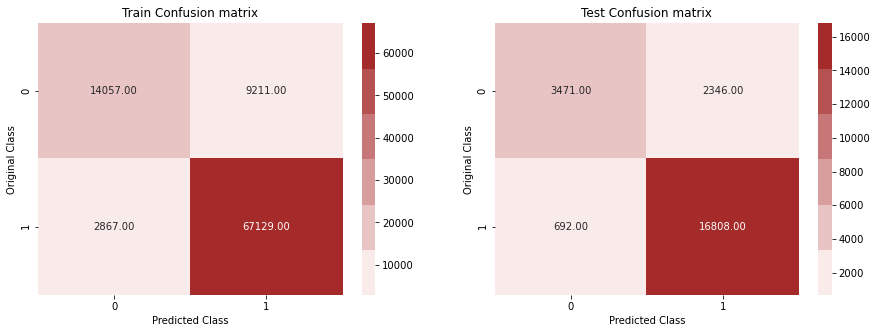

In [113]:
confusion_matrices_plot(y_train,y_train_pred,y_test,y_test_pred)

###### Observation
Here, we tried linear SVM classifer and used same approach as before to fine tune and train the model. Looking at the results we got, we observe that SVM is performing slightly better than LogisticRegression. From CM we observe that SVM is doing better for FPs than LR. let us look at some non-linear models.

### 6.3 Decision Tree 

Depth =  3 Train Score 0.8996323998844109 test Score 0.9007151531507219
Depth =  10 Train Score 0.9216664161668054 test Score 0.9137684349548756
Depth =  50 Train Score 0.96055841131155 test Score 0.8503521126760561
Depth =  100 Train Score 0.9801939951220879 test Score 0.7998886552022765
Depth =  250 Train Score 0.999306712028189 test Score 0.81105087445251
Depth =  500 Train Score 0.999306712028189 test Score 0.81105087445251


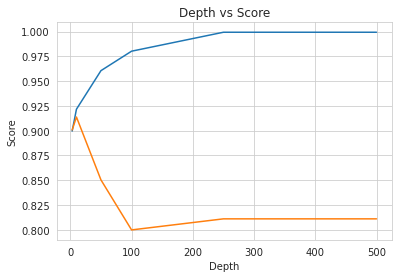

In [74]:
# Checking the variation of score with depth parameters of Decision Tree
depth = [3,10,50,100,250,500]
train_scores = []
test_scores = []
for i in depth:
    clf = DecisionTreeClassifier(max_depth=i,random_state=25)
    clf.fit(X_train_merge,y_train)
    train_sc = f1_score(y_train,clf.predict(X_train_merge))
    test_sc = f1_score(y_test,clf.predict(X_test_merge))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Depth = ',i,'Train Score',train_sc,'test Score',test_sc)

# plotting the score vs depth
plt.plot(depth,train_scores,label='Train Score')
plt.plot(depth,test_scores,label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs Score')
plt.show()

In [179]:
# Parameter tuning of DecisionTreeClassifier using RandomisedSearch CV technique
# https://medium.com/@mohtedibf/indepth-parameter-tuning-for-decision-tree-6753118a03c3
dt = DecisionTreeClassifier(random_state=25)

params = { "max_depth": sp_randint(3,500), "min_samples_split": sp_randint(50,200), "min_samples_leaf": sp_randint(2,50)}

random_cfl1 = RandomizedSearchCV(dt, param_distributions=params,verbose=10,scoring='f1',n_jobs=-1,random_state=25,
                               return_train_score=True)
random_cfl1.fit(X_train_merge,y_train)

print('mean test scores',random_cfl1.cv_results_['mean_test_score'])
print('mean train scores',random_cfl1.cv_results_['mean_train_score'])

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   23.3s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   36.2s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  3.2min finished


mean test scores [0.91557436 0.91628742 0.91423991 0.91543953 0.91487015 0.914826
 0.90957805 0.91458035 0.91572759 0.91308147]
mean train scores [0.91809843 0.91872172 0.9243587  0.91765626 0.92542611 0.92559125
 0.93113055 0.91925236 0.92069042 0.91751873]


In [180]:
# printing best parameters and scores
print("Best Parameters: ",random_cfl1.best_params_)
print("Best Score: ",random_cfl1.best_score_)

Best Parameters:  {'max_depth': 320, 'min_samples_leaf': 25, 'min_samples_split': 186}
Best Score:  0.9162874224316742


In [109]:
# Fitting the model on best parameters
dt = DecisionTreeClassifier(max_depth = 320, min_samples_leaf = 25, min_samples_split = 186,random_state=25)
dt.fit(X_train_merge,y_train)
pickle.dump(dt,open('models/decision_tree.pkl','wb'))

y_train_pred = dt.predict(X_train_merge)
y_test_pred = dt.predict(X_test_merge)

# printing train test score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9259282259344359
Test f1 score 0.8884944605078584


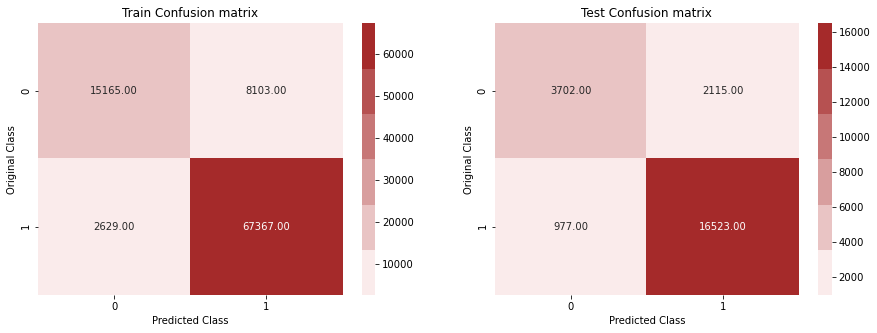

In [115]:
confusion_matrices_plot(y_train,y_train_pred,y_test,y_test_pred)

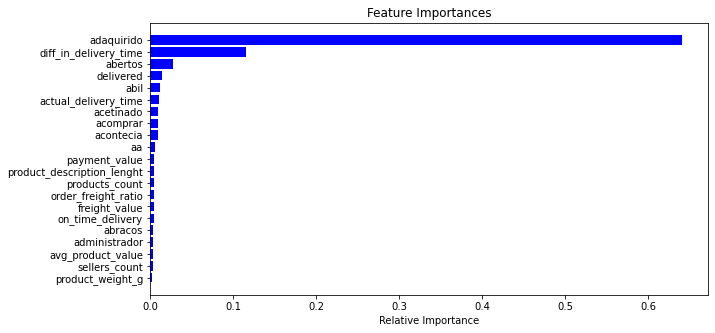

In [116]:
# checking some top features 
features = list(X_train.columns.values) + cv.get_feature_names() + vect.get_feature_names() + tf.get_feature_names()# features list 
importances = dt.feature_importances_ # importance extracted from the model
indices = np.argsort(importances)[-21:] # top 20 features by importance value

# plotting top 20 features
plt.figure(figsize=(10,5))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

###### Observation
After not getting promising results with linear models, we go with non linear models i.e tree and used DecsionTree Classifier as classification model. Firstly we trained the model for various values of depth of the tree to get the range of the parameters while fine uning the parameters during randomised serach cross validation. Keeping the results in last step as base line, the score obtained by this model during training is 0.88 which is better than previous model. 

Also, looking at the confusion matrices we see that we made some improvement in FalsePositives but while lost some in FalseNegatives suggesting that model is obviously learning differently than linear models. So, keeping these results in mind let us try ensemble techniques to further verify our hypothesis and try to achieve improved results.

We have also plotted feature importance map to look at some of the top features.

### 6.4 Random Forest

Estimators =  1 Train Score 0.8601480567550894 test Score 0.8599186290223153
Estimators =  2 Train Score 0.8610501122652916 test Score 0.8603820086260013
Estimators =  5 Train Score 0.8608816613937686 test Score 0.8618002466091246
Estimators =  10 Train Score 0.863028492788862 test Score 0.8635510325066694
Estimators =  50 Train Score 0.859617227231408 test Score 0.8598810635474518
Estimators =  100 Train Score 0.858630778950726 test Score 0.8588255502932444
Estimators =  250 Train Score 0.8593055521449795 test Score 0.85990171990172
Estimators =  500 Train Score 0.8591560533988032 test Score 0.8596202500552677


Text(0.5, 1.0, 'Estimators vs score at depth of 5')

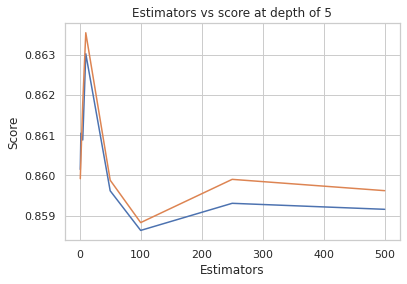

In [183]:
# Variation of score with estimators used in Random forest with other parameters set to constant value
estimators = [1,2,5,10,50,100,250,500]
train_scores = []
test_scores = []
for i in estimators:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=i, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(X_train_merge,y_train)
    train_sc = f1_score(y_train,clf.predict(X_train_merge))
    test_sc = f1_score(y_test,clf.predict(X_test_merge))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')

In [184]:
# Parameter tuning of Random forest classifier using Randomised search CV
param_dist = {"n_estimators":sp_randint(1,500),
              "max_depth": sp_randint(3,20),
              "min_samples_split": sp_randint(50,200),
              "min_samples_leaf": sp_randint(2,50)}

clf = RandomForestClassifier(random_state=25,n_jobs=-1)

random_cfl1 = RandomizedSearchCV(clf,param_distributions=param_dist,scoring='f1',verbose=10,n_jobs=-1,random_state=25,
                               return_train_score=True)
random_cfl1.fit(X_train_merge,y_train)

print('mean test scores',random_cfl1.cv_results_['mean_test_score'])
print('mean train scores',random_cfl1.cv_results_['mean_train_score'])

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  6.7min finished


mean test scores [0.86506082 0.8934173  0.86883415 0.86150344 0.85818185 0.88465954
 0.8656205  0.89274594 0.86428124 0.89461922]
mean train scores [0.86521046 0.89398833 0.86931985 0.86150172 0.85820732 0.88483594
 0.86593114 0.89309659 0.86459182 0.89486767]


In [185]:
# printing best parameters and score
print("Best Parameters: ",random_cfl1.best_params_)
print("Best Score: ",random_cfl1.best_score_)

Best Parameters:  {'max_depth': 19, 'min_samples_leaf': 40, 'min_samples_split': 166, 'n_estimators': 131}
Best Score:  0.8946192238252271


In [110]:
# Fitting the model on best parameters
rf = RandomForestClassifier(max_depth = 19, min_samples_leaf = 40, min_samples_split = 166, n_estimators = 131,random_state=25,
                           n_jobs=-1)
rf.fit(X_train_merge,y_train)
pickle.dump(rf,open('models/random_forest.pkl','wb'))

y_train_pred = rf.predict(X_train_merge)
y_test_pred = rf.predict(X_test_merge)

# printing train and test scores
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9251988003191811
Test f1 score 0.9222614840989399


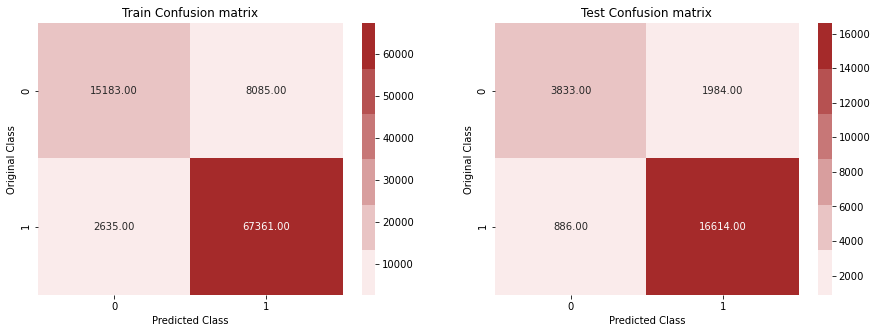

In [118]:
confusion_matrices_plot(y_train,y_train_pred,y_test,y_test_pred)

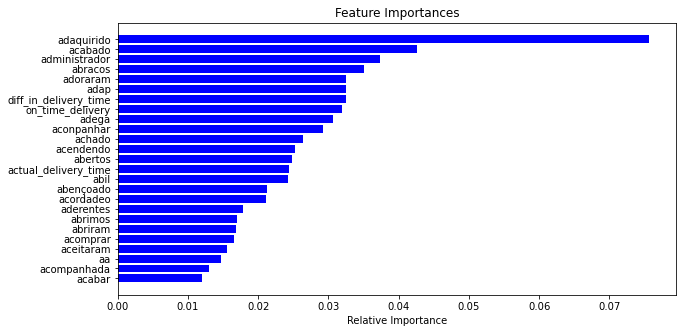

In [119]:
# plotting top 25 features
# features = list(X_train.columns.values) + cv.get_feature_names() + vect.get_feature_names() # features list 
importances = rf.feature_importances_ # importance generated by model
indices = np.argsort(importances)[-25:]

plt.figure(figsize=(10,5))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

###### Observation
From the previous models we observed that we were getting good results but the improvement was not that significant. So, we thought of going with ensemble models and the first one we will try is RandomForest.Let us see how this model do. We followed the same method for fine tuning and training the model as used in decision tree with some additional parameters like number of estimators etc. 

Now, looking at results of the model trained at best tuned parameters, we observe that model is performing somewaht similar to decision tree with almost same f1-score. Comparing the feature importance graph from previous one we observe that while the top 20 features are same but the order changed suggesting that these features are playing important role in teaching the model.

### 6.5 LightGBM

Estimators =  1 Train Score 0.857478868063212 test Score 0.8574858514834505
Estimators =  3 Train Score 0.857478868063212 test Score 0.8574858514834505
Estimators =  5 Train Score 0.8839211895343365 test Score 0.8832891928723868
Estimators =  10 Train Score 0.9159227650805039 test Score 0.9141008417185316
Estimators =  50 Train Score 0.9258674429142238 test Score 0.9201095829758973
Estimators =  100 Train Score 0.9297991416309013 test Score 0.9226340410219505
Estimators =  250 Train Score 0.936014449457802 test Score 0.9223805159821156
Estimators =  500 Train Score 0.9432057734960276 test Score 0.9213795403384931
Estimators =  1000 Train Score 0.953743265836894 test Score 0.9174004192872117


Text(0.5, 1.0, 'Estimators vs score at depth of 5')

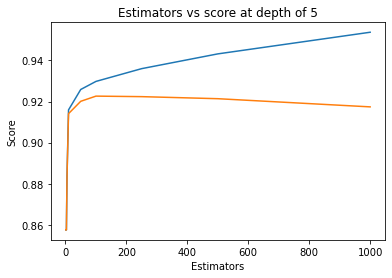

In [89]:
# Variation of score with estimators used in LGBM with other parameters set to default value
estimators = [1,3,5,10,50,100,250,500,1000]
train_scores = []
test_scores = []
for i in estimators:
    clf = LGBMClassifier(n_estimators=i, n_jobs=-1,random_state=25)
    clf.fit(X_train_merge,y_train)
    train_sc = f1_score(y_train,clf.predict(X_train_merge))
    test_sc = f1_score(y_test,clf.predict(X_test_merge))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')

In [90]:
# https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
# Prameter tuning of the LGBM parameters using RandonSearch CV
x_cfl=LGBMClassifier(random_state=25,n_jobs=-1)

prams={
    'learning_rate':[0.001,0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[1,3,5,10,50,100,250,500,1000],
     'max_depth':[3,5,10,15,20,50],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl1=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,random_state=25,scoring='f1',
                               return_train_score=True)
random_cfl1.fit(X_train_merge,y_train)

print('mean test scores',random_cfl1.cv_results_['mean_test_score'])
print('mean train scores',random_cfl1.cv_results_['mean_train_score'])

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   50.3s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.6min finished


mean test scores [0.92784267 0.91454799 0.92288333 0.92648653 0.85747887 0.92508267
 0.91743181 0.85747887 0.87580093 0.85907953]
mean train scores [0.93456205 0.9163616  0.92412152 0.92941303 0.85747887 0.92863612
 0.91788163 0.85747887 0.87665328 0.85921052]


In [92]:
# printing best parameters and score
print("Best Parameters: ",random_cfl1.best_params_)
print("Best Score: ",random_cfl1.best_score_)

Best Parameters:  {'subsample': 0.1, 'n_estimators': 1000, 'max_depth': 5, 'learning_rate': 0.05, 'colsample_bytree': 1}
Best Score:  0.9278426717877604


In [111]:
# Fitting the model on best parameters
lgbm = LGBMClassifier(n_estimators=1000, max_depth=5,subsample=0.5,learning_rate=0.05,colsample_bytree=1,random_state=25,
                      n_jobs=-1)
lgbm.fit(X_train_merge,y_train)
pickle.dump(lgbm,open('models/lgbm.pkl','wb'))

y_train_pred = lgbm.predict(X_train_merge)
y_test_pred = lgbm.predict(X_test_merge)

# printing train and test scores
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.945431567958131
Test f1 score 0.9220487507279331


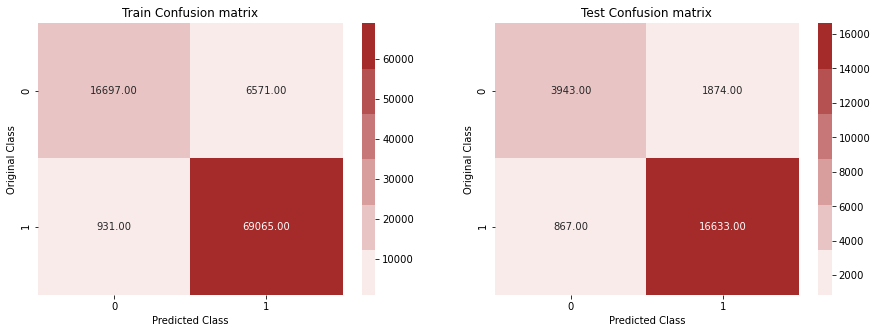

In [121]:
confusion_matrices_plot(y_train,y_train_pred,y_test,y_test_pred)

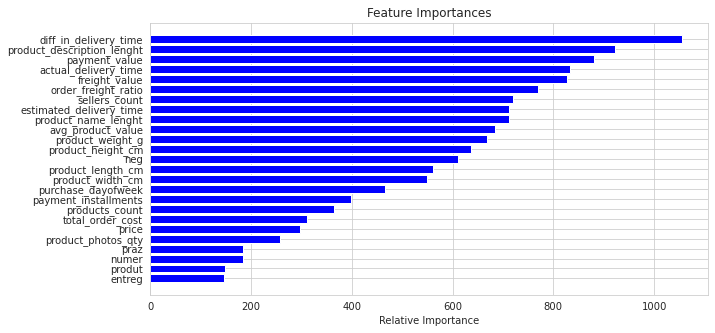

In [86]:
# ovserving top 25 features
importances = lgbm.feature_importances_
indices = np.argsort(importances)[-25:]

plt.figure(figsize=(10,5))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### XGBoost

In [97]:
# https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
# Prameter tuning of the LGBM parameters using RandonSearch CV
x_cfl=XGBClassifier(random_state=25,n_jobs=-1)

prams={
    'learning_rate':[0.001,0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[1,3,5,10,50,100,250,500,1000],
     'max_depth':[3,5,10,15,20,50],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl1=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,random_state=25,scoring='f1',
                               return_train_score=True)
random_cfl1.fit(X_train_merge,y_train)

print('mean test scores',random_cfl1.cv_results_['mean_test_score'])
print('mean train scores',random_cfl1.cv_results_['mean_train_score'])

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  7.4min finished


mean test scores [0.9251008  0.91400952 0.92265974 0.92682247 0.88123311 0.92593117
 0.91733377 0.91165461 0.8919354  0.91492644]
mean train scores [0.93156442 0.91708688 0.92423249 0.94071975 0.88136264 0.93382565
 0.91753967 0.91671298 0.89231671 0.91869895]


In [98]:
# printing best parameters and score
print("Best Parameters: ",random_cfl1.best_params_)
print("Best Score: ",random_cfl1.best_score_)

Best Parameters:  {'subsample': 0.5, 'n_estimators': 50, 'max_depth': 15, 'learning_rate': 0.2, 'colsample_bytree': 0.3}
Best Score:  0.9268224652389796


In [112]:
# Fitting the model on best parameters
xgb = XGBClassifier(n_estimators=50, max_depth=15,subsample=0.5,learning_rate=0.2,colsample_bytree=0.3,random_state=25,
                      n_jobs=-1)
xgb.fit(X_train_merge,y_train)
pickle.dump(xgb,open('models/xgb.pkl','wb'))

y_train_pred = xgb.predict(X_train_merge)
y_test_pred = xgb.predict(X_test_merge)

# printing train and test scores
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9629005524861879
Test f1 score 0.9076014801841756


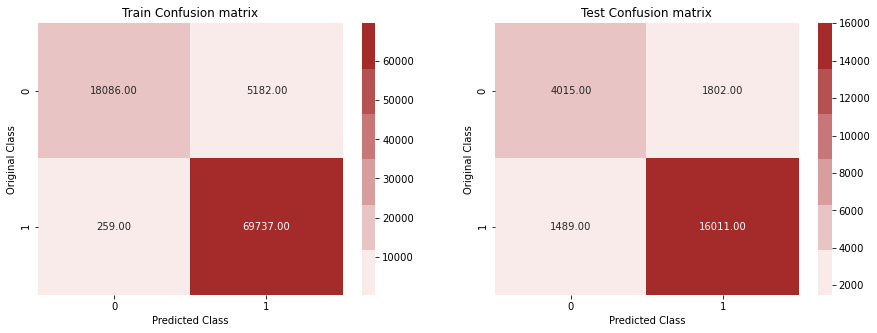

In [123]:
confusion_matrices_plot(y_train,y_train_pred,y_test,y_test_pred)

### AdaBoost

In [106]:
# https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
# Prameter tuning of the LGBM parameters using RandonSearch CV
x_cfl=AdaBoostClassifier(random_state=25)

prams={
    'learning_rate':[0.001,0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[1,3,5,10,50,100,250,500,1000]
}
random_cfl1=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,random_state=25,scoring='f1',
                               return_train_score=True)
random_cfl1.fit(X_train_merge,y_train)

print('mean test scores',random_cfl1.cv_results_['mean_test_score'])
print('mean train scores',random_cfl1.cv_results_['mean_train_score'])

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  7.7min finished


mean test scores [0.88827036 0.88827036 0.88827036 0.88827036 0.88827036 0.88827036
 0.88827036 0.91451486 0.88827036 0.91541745]
mean train scores [0.88827055 0.88827055 0.88827055 0.88827055 0.88827055 0.88827055
 0.88827055 0.91453862 0.88827055 0.91550551]


In [107]:
# printing best parameters and score
print("Best Parameters: ",random_cfl1.best_params_)
print("Best Score: ",random_cfl1.best_score_)

Best Parameters:  {'n_estimators': 500, 'learning_rate': 0.05}
Best Score:  0.9154174503715952


In [113]:
# Fitting the model on best parameters
ada = AdaBoostClassifier(n_estimators=500, learning_rate=0.05, random_state=25)
ada.fit(X_train_merge,y_train)
pickle.dump(ada,open('models/ada_boost.pkl','wb'))

y_train_pred = ada.predict(X_train_merge)
y_test_pred = ada.predict(X_test_merge)

# printing train and test scores
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9200963207398312
Test f1 score 0.9179972183588317


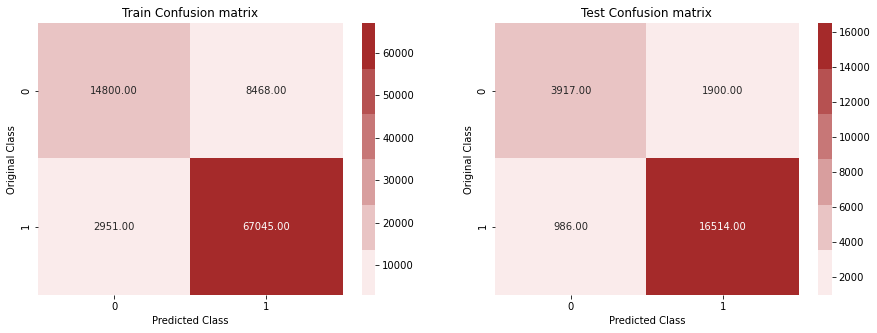

In [125]:
confusion_matrices_plot(y_train,y_train_pred,y_test,y_test_pred)

###### Observation
From the previous approches we found that ensembles are working well but we are yet to get beeter results. so, we decided to go with boosting techniques and decided to use Boosting Classifiers. We tried XGBoost, LightGBM and AdaBoost. Amongst them, the AdaBoost is found to be performing same as random forest but we got good resultswith XGBoost and LightGBM. The XgBoost achived best performance for training set among all the models with 0.94 f1 score while LGBM achieved best result on validation set with 0.93 f1-score. That means we got our best perfroming models but to furhter look for improvement we decided to go for stacking classifier.

### StackingClassifier

In [114]:
estimators = [('lr', SGDClassifier(loss='log', alpha=0.001, n_jobs=-1, random_state=25)),
              ('svm',SGDClassifier(loss='hinge', alpha=0.001, n_jobs=-1, random_state=25)),
              ('dt', DecisionTreeClassifier(max_depth = 320, min_samples_leaf = 25, min_samples_split = 186,random_state=25)),
              ('rf', RandomForestClassifier(max_depth = 19, min_samples_leaf = 40, min_samples_split = 166, n_estimators = 131,random_state=25,
                           n_jobs=-1)),
             ('xgb', XGBClassifier(n_estimators=50, max_depth=15,subsample=0.5,learning_rate=0.2,colsample_bytree=0.3,random_state=25,
                      n_jobs=-1)),
             ]

In [1]:
clf = StackingClassifier(estimators=estimators,final_estimator = XGBClassifier(), n_jobs=-1)

clf.fit(X_train_merge,y_train)
pickle.dump(clf,open('models/best_stacking.pkl','wb'))

y_train_pred = clf.predict(X_train_merge)
y_test_pred = clf.predict(X_test_merge)

# printing train and test scores
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9691659002109194
Test f1 score 0.9260845437300038


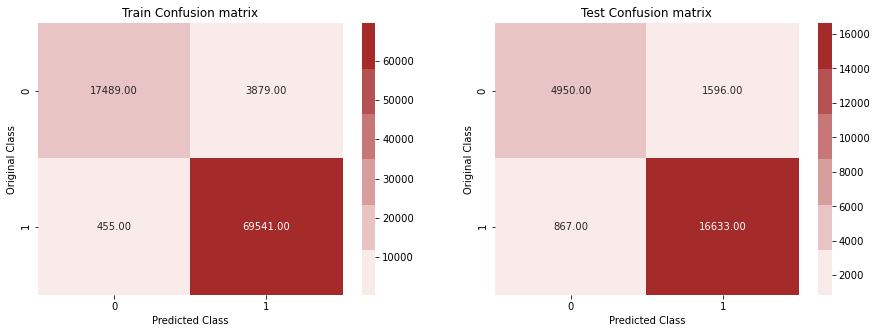

In [107]:
# CM plot for best stacking classifier
confusion_matrices_plot(y_train,y_train_pred,y_test,y_test_pred)

###### Observation
In this approach, we kept our models tried so far as base estimators and trained another model on the predictions made by thes models to find learn some relation and improve our performance. We tried different different models for meta classifer and observed the result. We found best reslult with XGB as meta classifier with 0.9698 f1-score.

### 6.7 Ensemble Voting Classifier

In [57]:
vt = VotingClassifier(estimators=estimators,voting='hard', n_jobs=-1)
vt.fit(X_train_merge,y_train)

y_train_pred = vt.predict(X_train_merge)
y_test_pred = vt.predict(X_test_merge)
# printing train and test scores
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9289119085450157
Test f1 score 0.9228559591216682


In [116]:
estimators = [('lr', SGDClassifier(loss='log', alpha=0.001, n_jobs=-1, random_state=25)),
              ('dt', DecisionTreeClassifier(max_depth = 320, min_samples_leaf = 25, min_samples_split = 186,random_state=25)),
              ('rf', RandomForestClassifier(max_depth = 19, min_samples_leaf = 40, min_samples_split = 166, n_estimators = 131,random_state=25,
                           n_jobs=-1)),
             ('xgb', XGBClassifier(n_estimators=50, max_depth=15,subsample=0.5,learning_rate=0.2,colsample_bytree=0.3,random_state=25,
                      n_jobs=-1)),
             ]

vt = VotingClassifier(estimators=estimators,voting='soft', n_jobs=-1)
vt.fit(X_train_merge,y_train)
pickle.dump(vt,open('models/best_voting.pkl','wb'))

y_train_pred = vt.predict(X_train_merge)
y_test_pred = vt.predict(X_test_merge)
# printing train and test scores
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9366826309505839
Test f1 score 0.9245750123782803


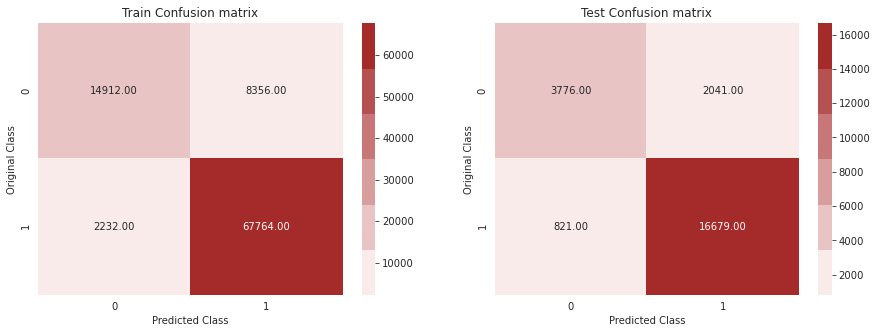

In [105]:
confusion_matrices_plot(y_train,y_train_pred,y_test,y_test_pred)

###### Observation
In this approach, we kept our models tried so far as base estimators and trained another model on the probalistic values as well as predicted labels for each class predicted by the models. We will use sklearn Voting classifier model for this task with LR,DT,RF,and LGBM as base estimators and voting= soft/hard. The results obtained for both are similar but it does not surpass the results achieved by best stacking classifier.

|**MODELS**|**HYPERPARAMETERS**|**F1-SCORE**|
|------|--------|-------|
|LogisticRegression|alpha|0.9172|
|DecisionTree|max_depth|0.9262|
|Linear SVM|alpha|0.9174|
|Random Forest|max_depth,n_estimators,min_samples_leaf|0.9263|
|XGBoost(Boosting)|max_depth,n_estimators,learning_rate|0.9625|
|Stacking Classifier)|no_of_base_models, meta_classifier|0.96|
|Voting Classifer|estimators,voting,weights|0.9366|

### Summary On ML Models:-

Here, I will try to summarize what i tried and what worked and what did not. For training data we encoded categorical data with one hot encoding, standarized numerical features while for text features we tried **binary BOW, tfidf vectorizer, average w2v and tfidf averaged w2v** where w2v is trained on custom corpus using inbulit gensim models. We also tried previouly trained glove vectors on portugese words as shown above in the notebook. Various ML models including the models shown in the notebook are trained and evaluated on the these training data each. The best performing models are kept here in the notebook and among them the best is observed.

The training data with **standardized numerical features, one hot encoded categorical features and text features encoded using tfidf averaged w2v** gave best results for the models tried. Among them **XGBoost** achieved the best result with 0.96 f1-score.

To further improve the results, we tried **Stacking and Voting ensemble** technique with taking the base estimators from the models trained above in the notebook like LR, SVM, DT, RF, XGBoost and ADAClassifier etc. either all of them at time or some of them at time.

In voting classifier, we tried both the **hard and soft voting** technique as well as permutate the base estimators but we could not achieve the results better than the XGBoost.

For stacking, I also tried two-level custom stacking where I first trained a mix of linear and ensemble models on the predictions on the training data and then trained another layer mix of linear and ensemble models on the predictions made by this first layer and then finally a meta-classifier and observed the results.

The meta classifier is also varied for various types of models similar to base models from linear to ensemble models and the performance is observed. The best performing stacking model was found to be the models having LR, SVM, DT, RF, XGB as base estimators and **XGBoost** as meta classifier. All the other sequences of the models tried could not achieve the results given by this set of the stacking models. Finally, we achieved performance score of 0.9698 f1-score.

### Neural Networks Models
#### Simple NN model

In [1]:
import tensorflow as tf
import datetime
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense,Flatten,concatenate,Dropout,BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPooling1D, MaxPool1D
from tensorflow.keras.models import Model

In [2]:
log_dir1 = "models/logs/fit1/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tbc1 = tf.keras.callbacks.TensorBoard(log_dir=log_dir1,histogram_freq=1, write_graph=True,write_grads=True)

es1 = EarlyStopping(monitor='val_loss',verbose=1,patience=5)
mc1 = ModelCheckpoint("models/best_model1.h5",monitor='val_loss',save_best_only=True)
rl = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='min')

callbacks = [tbc1,es1,mc1,rl]

In [3]:
from keras import backend as K
# https://datascience.stackexchange.com/questions/45165/how-to-get-accuracy-f1-precision-and-recall-for-a-keras-model

def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

Using TensorFlow backend.


In [117]:
input_data = Input(shape=(X_train_merge.shape[1],),name='input_layer')
dense1 = Dense(64, activation="relu", kernel_initializer="he_uniform", name="layer1")(input_data)
bn1 = BatchNormalization()(dense1)
dense2 = Dense(32, activation="relu",kernel_initializer="he_uniform", name="layer2")(bn1)
bn2 = BatchNormalization()(dense2) 
# dropout1 = Dropout(0.1)(bn3)
dense3 = Dense(16, activation="relu",kernel_initializer="he_uniform", name="layer4")(bn2)
output = Dense(1, activation="sigmoid", name="output")(dense3)

model1 = Model(inputs=input_data,outputs=output)
model1.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 401)]             0         
_________________________________________________________________
layer1 (Dense)               (None, 64)                25728     
_________________________________________________________________
batch_normalization_4 (Batch (None, 64)                256       
_________________________________________________________________
layer2 (Dense)               (None, 32)                2080      
_________________________________________________________________
batch_normalization_5 (Batch (None, 32)                128       
_________________________________________________________________
layer4 (Dense)               (None, 16)                528       
_________________________________________________________________
output (Dense)               (None, 1)                

In [118]:
# opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model1.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy',f1],run_eagerly=True)

hist = model1.fit(X_train_merge.toarray(),y_train,epochs=50,validation_data=(X_test_merge.toarray(),y_test),
                    verbose=1,callbacks=callbacks)

Epoch 1/50
2915/2915 [==============================] - 79s 27ms/step - loss: 0.3757 - accuracy: 0.8626 - f1: 0.9111 - val_loss: 0.3615 - val_accuracy: 0.8674 - val_f1: 0.9143
Epoch 2/50
2915/2915 [==============================] - 79s 27ms/step - loss: 0.3632 - accuracy: 0.8674 - f1: 0.9141 - val_loss: 0.3479 - val_accuracy: 0.8689 - val_f1: 0.9157
Epoch 3/50
2915/2915 [==============================] - 79s 27ms/step - loss: 0.3512 - accuracy: 0.8706 - f1: 0.9159 - val_loss: 0.3856 - val_accuracy: 0.8444 - val_f1: 0.8936
Epoch 4/50
2915/2915 [==============================] - 81s 28ms/step - loss: 0.3440 - accuracy: 0.8732 - f1: 0.9172 - val_loss: 0.3419 - val_accuracy: 0.8726 - val_f1: 0.9161
Epoch 5/50
2915/2915 [==============================] - 80s 27ms/step - loss: 0.3408 - accuracy: 0.8754 - f1: 0.9186 - val_loss: 0.3420 - val_accuracy: 0.8762 - val_f1: 0.9194
Epoch 6/50
2915/2915 [==============================] - 80s 27ms/step - loss: 0.3385 - accuracy: 0.8762 - f1: 0.9191 - v

0.925858525750583


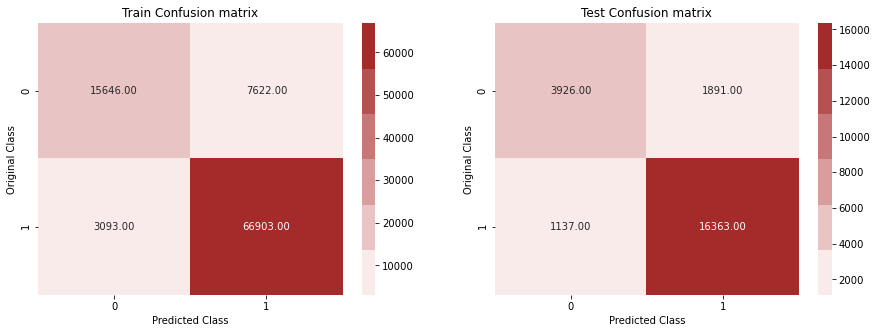

In [78]:
y_train_pred1 = model1.predict(X_train_merge.toarray())
y_test_pred1 = model1.predict(X_test_merge.toarray())
y_train_pred = np.greater(y_train_pred1,0.5).astype(int)
y_test_pred = np.greater(y_test_pred1,0.5).astype(int)

print(f1_score(y_train,y_train_pred))
confusion_matrices_plot(y_train,y_train_pred,y_test,y_test_pred)

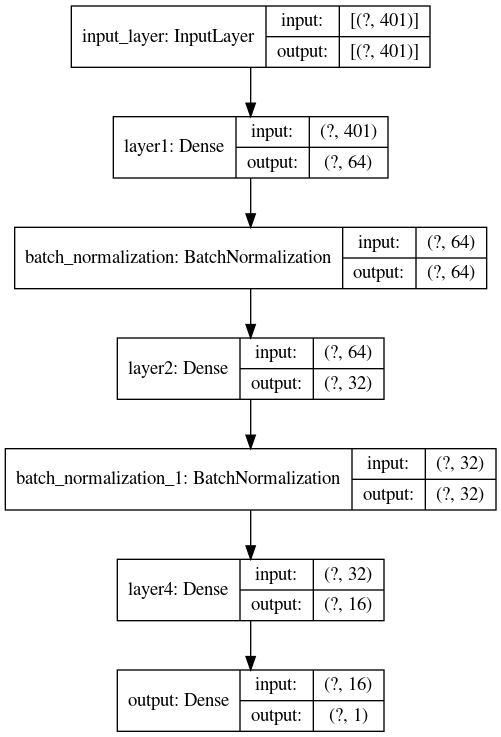

In [60]:
tf.keras.utils.plot_model(
    model1,
    to_file="models/model_NN.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

#### CNN

In [132]:
# Input to CNN and LSTMs
X_train_merge_inp = X_train_merge.toarray().reshape(X_train_merge.shape[0],X_train_merge.shape[1],1)
X_test_merge_inp = X_test_merge.toarray().reshape(X_test_merge.shape[0],X_test_merge.shape[1],1)
print("X_train_merge_inp: ",X_train_merge_inp.shape)
print("X_test_merge_inp: ",X_test_merge_inp.shape)
X_train_other_inp = X_train_other.toarray().reshape(X_train_other.shape[0],X_train_other.shape[1],1)
X_test_other_inp = X_test_other.toarray().reshape(X_test_other.shape[0],X_test_other.shape[1],1)
print("X_train_other_inp: ",X_train_other_inp.shape)
print("X_test_other_inp: ",X_test_other_inp.shape)

X_train_merge_inp:  (93264, 401, 1)
X_test_merge_inp:  (23317, 401, 1)
X_train_other_inp:  (93264, 101, 1)
X_test_other_inp:  (23317, 101, 1)


In [63]:
sent_input = Input(shape=X_train_merge_inp.shape[1:], name='text_data_input')

conv1N = Conv1D(16,kernel_size=(3,),strides=(1,),padding='valid',activation='relu')(sent_input)
bn1 = BatchNormalization()(conv1N)
conv1M = Conv1D(8,kernel_size=(3,),strides=(1,),padding='valid',activation='relu')(bn1)

maxpool1 = MaxPool1D(pool_size=5)(conv1M)

conv1k = Conv1D(16,kernel_size=(5,),strides=(1,),padding='valid',activation='relu')(maxpool1)
bn2 = BatchNormalization()(conv1k)
conv1t = Conv1D(8,kernel_size=(5,),strides=(1,),padding='valid',activation='relu')(bn2)

maxpool2 = MaxPool1D(pool_size=5)(conv1t)

flatten = Flatten()(maxpool2)

dropout = Dropout(0.2)(flatten)
dense1 = Dense(16, activation='relu')(dropout)

output = Dense(1, activation='sigmoid',name='output')(dense1)

cnn_model1 = Model(inputs=sent_input,outputs=output)
cnn_model1.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text_data_input (InputLayer) [(None, 401, 1)]          0         
_________________________________________________________________
conv1d (Conv1D)              (None, 399, 16)           64        
_________________________________________________________________
batch_normalization_2 (Batch (None, 399, 16)           64        
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 397, 8)            392       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 79, 8)             0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 75, 16)            656       
_________________________________________________________________
batch_normalization_3 (Batch (None, 75, 16)           

In [79]:
log_dir1 = "models/logs/fit2/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tbc1 = tf.keras.callbacks.TensorBoard(log_dir=log_dir1,histogram_freq=1, write_graph=True,write_grads=True)

es1 = EarlyStopping(monitor='val_loss',patience=5,verbose=1)
mc1 = ModelCheckpoint("models/cnn_model1.h5",monitor='val_loss',save_best_only=True)
rl = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='min')

callbacks = [tbc1,es1,mc1,rl]


cnn_model1.compile(loss='binary_crossentropy',optimizer='sgd',metrics=['accuracy',f1]) # best result for sgd(0.01 and momentum=0.9)

hist = cnn_model1.fit(X_train_merge_inp,y_train,epochs=50,validation_data=(X_test_merge_inp,y_test),
                    verbose=1, callbacks=callbacks)

Epoch 1/50
   1/2915 [..............................] - ETA: 0s - loss: 0.8639 - accuracy: 0.4375 - f1: 0.1818WARNING:tensorflow:From /opt/conda/lib/python3.7/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
2915/2915 [==============================] - 176s 60ms/step - loss: 0.3848 - accuracy: 0.8578 - f1: 0.9083 - val_loss: 0.3668 - val_accuracy: 0.8645 - val_f1: 0.9127
Epoch 2/50
2915/2915 [==============================] - 232s 79ms/step - loss: 0.3716 - accuracy: 0.8653 - f1: 0.9127 - val_loss: 0.3759 - val_accuracy: 0.8628 - val_f1: 0.9121
Epoch 3/50
2915/2915 [==============================] - 136s 47ms/step - loss: 0.3686 - accuracy: 0.8668 - f1: 0.9139 - val_loss: 0.3661 - val_accuracy: 0.8656 - val_f1: 0.9135
Epoch 4/50
2915/2915 [==============================] - 129s 44ms/step - loss: 0.3652 - accu

0.9228907800647108


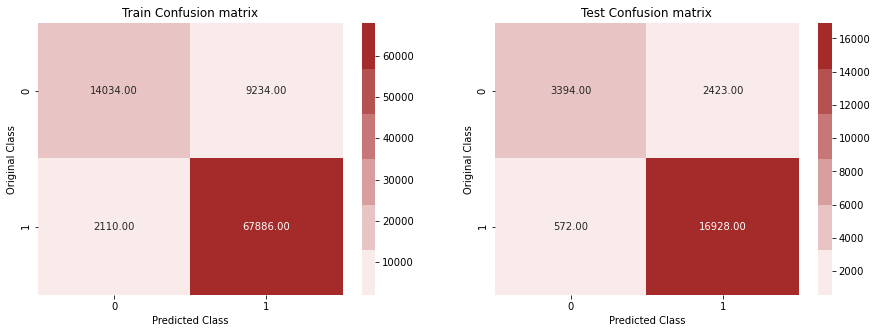

In [87]:
y_train_pred2 = cnn_model1.predict(X_train_merge_inp)
y_test_pred2 = cnn_model1.predict(X_test_merge_inp)
y_train_pred = np.greater(y_train_pred2,0.5).astype(int)
y_test_pred = np.greater(y_test_pred2,0.5).astype(int)

print(f1_score(y_train,y_train_pred))
confusion_matrices_plot(y_train,y_train_pred,y_test,y_test_pred)

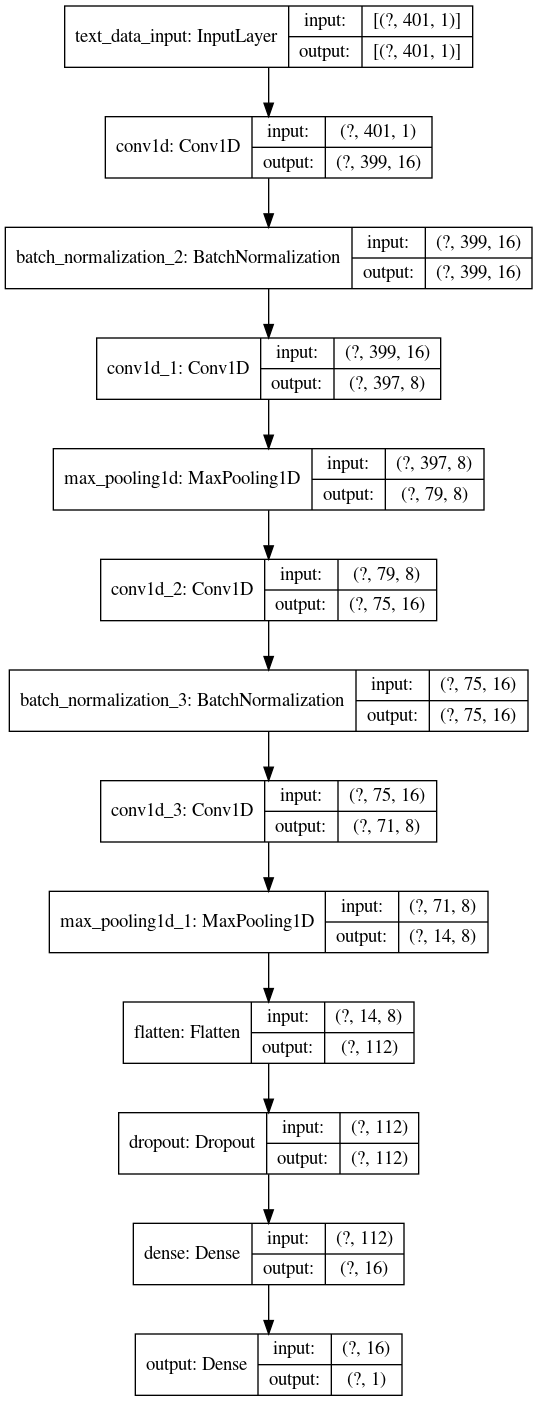

In [64]:
tf.keras.utils.plot_model(
    cnn_model1,
    to_file="models/cnn_model1.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

#### CNN-2

In [122]:
#Defining Inputs 
review_comment = Input(shape=(X_train_padded_text.shape[1],), name='review_comment')
other_input = Input(shape= X_train_other_inp.shape[1:], name='other_input')

# This embedding layer will encode the input sequence
embedding_text = Embedding(input_dim=vocab_size,output_dim=300, input_length=len(X_train_padded_text[0]),
                           weights=[embedding_matrix],trainable=False)(review_comment)
review_comment_c1 = Conv1D(16,5, activation='relu',padding='same')(embedding_text)
review_comment_flatten = Flatten()(review_comment_c1)

other_input_1 = Conv1D(16,5, activation='relu',padding='same')(other_input)
other_input_1 = MaxPooling1D(pool_size=5)(other_input_1)
other_input_1 = Flatten()(other_input_1)
#merge them two
x = concatenate([review_comment_flatten,other_input_1])
# And finally we add the main logistic regression layer
output =Dense(32, activation='relu')(x)
output =Dropout(0.2)(output)
output =Dense(32, activation='relu')(output)
output =Dropout(0.2)(output)
output =Dense(8, activation='relu')(output)
output =Dense(1, activation='sigmoid',name='output')(output)

#defines model with multiple input one output
cnn_model2 = Model(inputs=[review_comment, other_input], outputs=output)
cnn_model2.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
review_comment (InputLayer)     [(None, 122)]        0                                            
__________________________________________________________________________________________________
other_input (InputLayer)        [(None, 101, 1)]     0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 122, 300)     4518000     review_comment[0][0]             
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 101, 16)      96          other_input[0][0]                
_______________________________________________________________________________________

In [123]:
log_dir1 = "models/logs/fit3/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tbc1 = tf.keras.callbacks.TensorBoard(log_dir=log_dir1,histogram_freq=1, write_graph=True,write_grads=True)

es1 = EarlyStopping(monitor='val_loss',verbose=1,patience=2)
mc1 = ModelCheckpoint("models/cnn_model2.h5",monitor='val_loss',save_best_only=True)
rl = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='min')

callbacks = [tbc1,es1,mc1,rl]

cnn_model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy',f1]) # best result for adam

hist = cnn_model2.fit([X_train_padded_text, X_train_other_inp],y_train,epochs=50,
                      validation_data=([X_test_padded_text, X_test_other_inp],y_test), verbose=1,callbacks=callbacks)

Epoch 1/50
   1/2915 [..............................] - ETA: 0s - loss: 0.6929 - accuracy: 0.5938 - f1: 0.7451WARNING:tensorflow:From /opt/conda/lib/python3.7/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
2915/2915 [==============================] - 159s 55ms/step - loss: 0.3804 - accuracy: 0.8621 - f1: 0.9111 - val_loss: 0.3620 - val_accuracy: 0.8696 - val_f1: 0.9154
Epoch 2/50
2915/2915 [==============================] - 194s 67ms/step - loss: 0.3593 - accuracy: 0.8712 - f1: 0.9165 - val_loss: 0.3522 - val_accuracy: 0.8726 - val_f1: 0.9177
Epoch 3/50
2915/2915 [==============================] - 114s 39ms/step - loss: 0.3472 - accuracy: 0.8741 - f1: 0.9182 - val_loss: 0.3356 - val_accuracy: 0.8799 - val_f1: 0.9218
Epoch 4/50
2915/2915 [==============================] - 172s 59ms/step - loss: 0.3352 - accu

0.9390199612150781


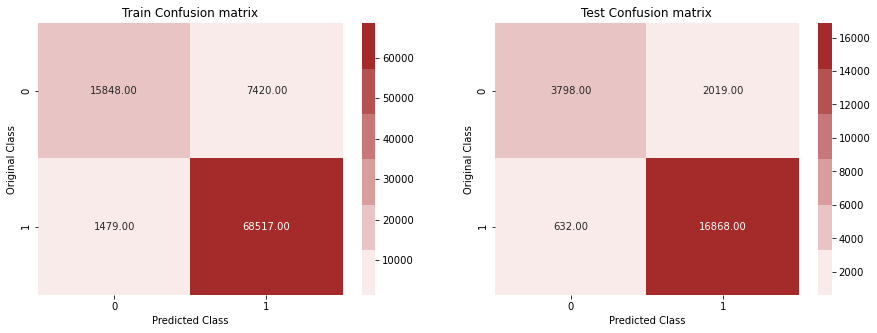

In [78]:
y_train_pred3 = cnn_model2.predict([X_train_padded_text, X_train_other_inp])
y_test_pred3 = cnn_model2.predict([X_test_padded_text, X_test_other_inp])
y_train_pred = np.greater(y_train_pred3,0.5).astype(int)
y_test_pred = np.greater(y_test_pred3,0.5).astype(int)

print(f1_score(y_train,y_train_pred))
confusion_matrices_plot(y_train,y_train_pred,y_test,y_test_pred)

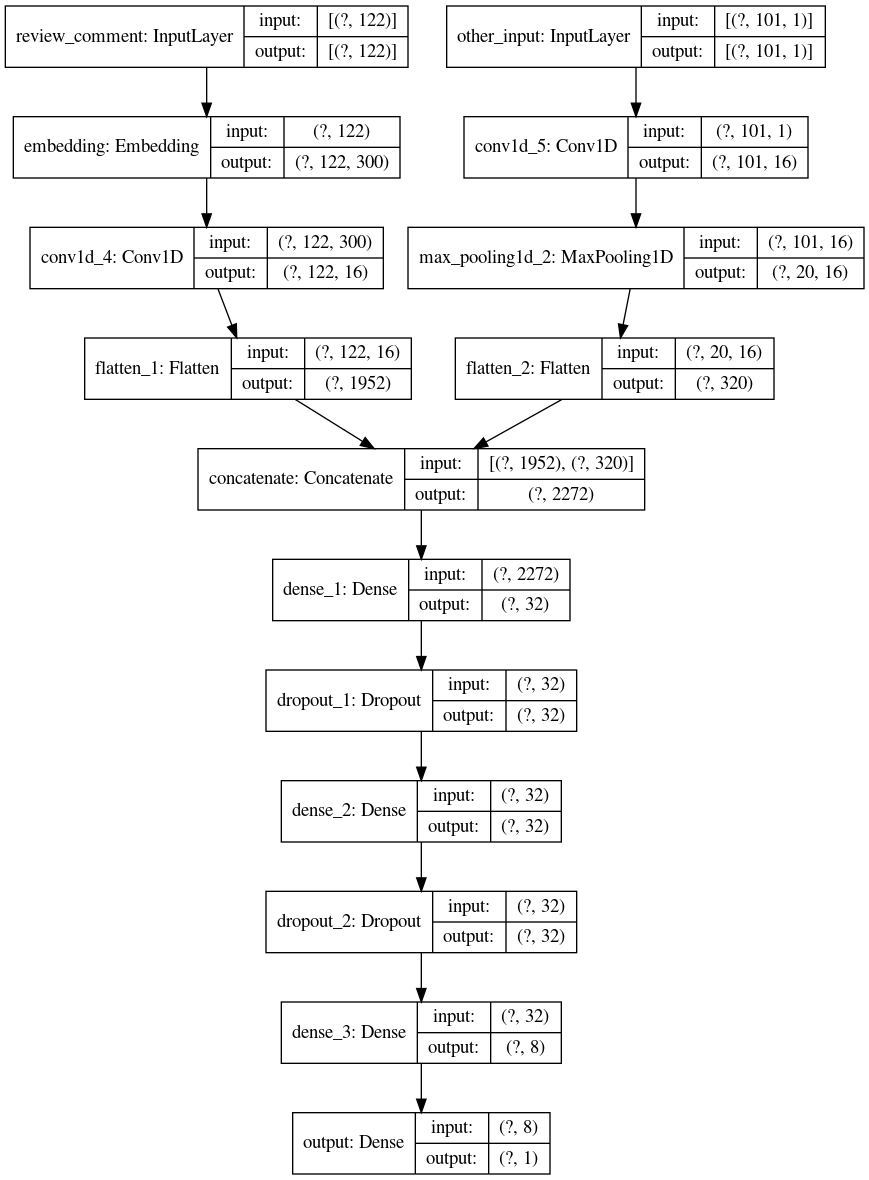

In [66]:
tf.keras.utils.plot_model(
    cnn_model2,
    to_file="models/cnn_model2.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

#### LSTM - 1

In [124]:
#Defining Inputs 
review_comment = Input(shape=(X_train_padded_text.shape[1],), name='review_comment')
order_status = Input(shape=(training_os.shape[1],), name='order_status')
product_category = Input(shape=(training_pc.shape[1],), name='product_category')
numeral_input = Input(shape=(X_train.shape[1],),name='numeral_input')

review_comment_embed = Embedding(input_dim = vocab_size, output_dim=300, input_length = X_train_padded_text.shape[1],
                          weights=[embedding_matrix], trainable=False)(review_comment)
review_comment_lstm = LSTM(8,return_sequences=True)(review_comment_embed)
review_comment_flatten = Flatten()(review_comment_lstm)

order_status_embed = Embedding(input_dim=training_os.shape[1],output_dim=16, input_length=training_os.shape[1])(order_status)
order_status_flatten = Flatten()(order_status_embed)

product_category_embed = Embedding(input_dim=training_pc.shape[1],output_dim=16, input_length=training_pc.shape[1])(product_category)
product_category_flatten = Flatten()(product_category_embed)

numeral_input_1 = Dense(32)(numeral_input)
x = concatenate([review_comment_flatten,order_status_flatten,product_category_flatten,numeral_input_1])

# And finally we add the main logistic regression layer
output =Dense(32, activation='relu')(x)
output =BatchNormalization()(output)
# output =Dropout(0.2)(output)
output =Dense(16, activation='relu')(output)
# output =BatchNormalization()(output)
output =Dropout(0.2)(output)
output =Dense(8, activation='relu')(output)
output =BatchNormalization()(output)
# output =Dropout(0.2)(output)
output =Dense(1, activation='sigmoid',name='output')(output)

#defines model with multiple input one output
lstm_model1 = Model(inputs=[review_comment,order_status,product_category,numeral_input], outputs=output)
lstm_model1.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
review_comment (InputLayer)     [(None, 122)]        0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 122, 300)     4518000     review_comment[0][0]             
__________________________________________________________________________________________________
order_status (InputLayer)       [(None, 7)]          0                                            
__________________________________________________________________________________________________
product_category (InputLayer)   [(None, 70)]         0                                            
_______________________________________________________________________________________

In [125]:
log_dir1 = "models/logs/fit4/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tbc1 = tf.keras.callbacks.TensorBoard(log_dir=log_dir1,histogram_freq=1, write_graph=True,write_grads=True)

es1 = EarlyStopping(monitor='val_loss',verbose=1,patience=5)
mc1 = ModelCheckpoint("models/lstm_model1.h5",monitor='val_loss',save_best_only=True)
rl = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='min')

callbacks = [tbc1,es1,mc1,rl]


lstm_model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy',f1]) #best for adam

hist = lstm_model1.fit([X_train_padded_text, training_os.toarray(), training_pc.toarray(),X_train],y_train,epochs=50,
                validation_data=([X_test_padded_text, test_os.toarray(), test_pc.toarray(),X_test],y_test), verbose=1,
                      callbacks=callbacks)

Epoch 1/50
2915/2915 [==============================] - 436s 149ms/step - loss: 0.3820 - accuracy: 0.8620 - f1: 0.9104 - val_loss: 0.3466 - val_accuracy: 0.8744 - val_f1: 0.9190
Epoch 2/50
2915/2915 [==============================] - 427s 147ms/step - loss: 0.3458 - accuracy: 0.8748 - f1: 0.9183 - val_loss: 0.3540 - val_accuracy: 0.8799 - val_f1: 0.9224
Epoch 3/50
2915/2915 [==============================] - 423s 145ms/step - loss: 0.3412 - accuracy: 0.8768 - f1: 0.9196 - val_loss: 0.3438 - val_accuracy: 0.8698 - val_f1: 0.9127
Epoch 4/50
2915/2915 [==============================] - 428s 147ms/step - loss: 0.3375 - accuracy: 0.8791 - f1: 0.9212 - val_loss: 0.3283 - val_accuracy: 0.8791 - val_f1: 0.9200
Epoch 5/50
2915/2915 [==============================] - 429s 147ms/step - loss: 0.3353 - accuracy: 0.8803 - f1: 0.9219 - val_loss: 0.3292 - val_accuracy: 0.8804 - val_f1: 0.9216
Epoch 6/50
2915/2915 [==============================] - 435s 149ms/step - loss: 0.3340 - accuracy: 0.8809 - f1

0.9268585550428292


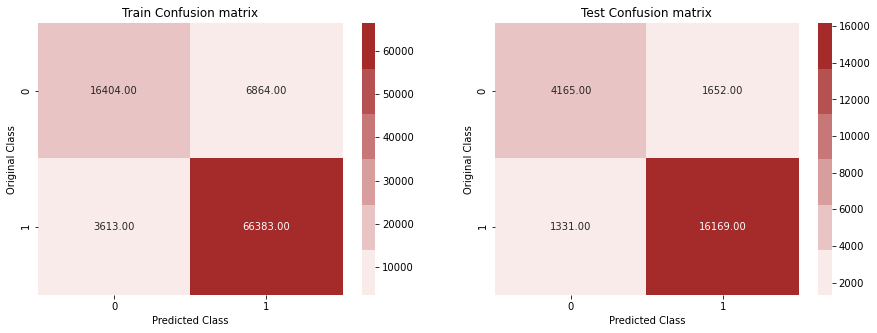

In [85]:
y_train_pred4 = lstm_model1.predict([X_train_padded_text, training_os.toarray(), training_pc.toarray(),X_train])
y_test_pred4 = lstm_model1.predict([X_test_padded_text, test_os.toarray(), test_pc.toarray(),X_test])
y_train_pred = np.greater(y_train_pred4,0.5).astype(int)
y_test_pred = np.greater(y_test_pred4,0.5).astype(int)

print(f1_score(y_train,y_train_pred))
confusion_matrices_plot(y_train,y_train_pred,y_test,y_test_pred)

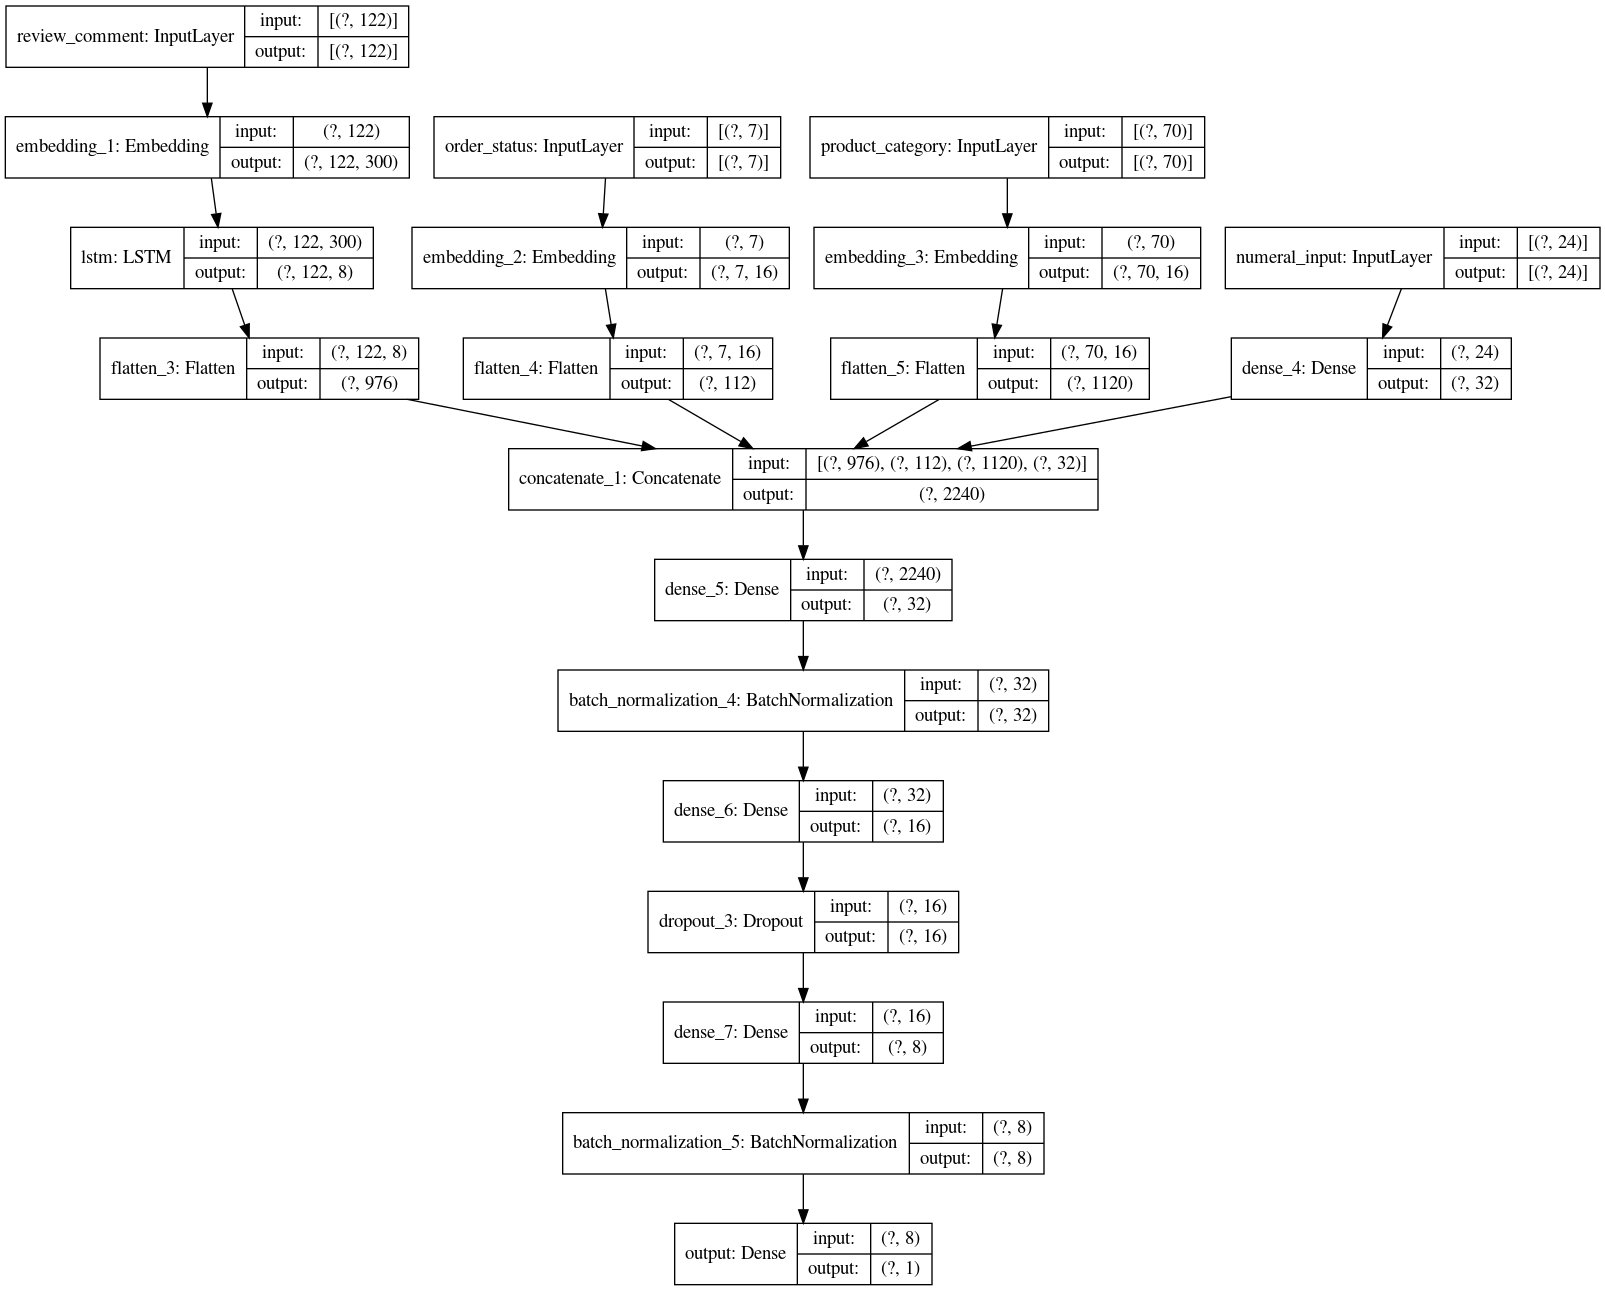

In [68]:
tf.keras.utils.plot_model(
    lstm_model1,
    to_file="models/lstm_model1.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96
)

#### lstm-2

In [126]:
#Defining Inputs 
review_comment = Input(shape=(X_train_padded_text.shape[1],), name='review_comment')
other_input = Input(shape= X_train_other_inp.shape[1:], name='other_input')

review_comment_embed = Embedding(input_dim = vocab_size, output_dim=300, input_length = X_train_padded_text.shape[1],
                          weights=[embedding_matrix], trainable=False)(review_comment)
review_comment_lstm = LSTM(8,return_sequences=True)(review_comment_embed)
review_comment_flatten = Flatten()(review_comment_lstm)


# other_input = Embedding(input_dim = X_train_other.shape[1],output_dim=128, input_length=X_train_other.shape[1])(other_input)
other_input_1 = Conv1D(8,5, activation='relu',padding='same')(other_input)
other_input_1 = MaxPooling1D(pool_size=5)(other_input_1)
other_input_1 = Flatten()(other_input_1)
#merge them two
x = concatenate([review_comment_flatten,other_input_1])
# And finally we add the main logistic regression layer
output = Dense(16, activation='relu')(x)
output = Dropout(0.2)(output)
output = Dense(8, activation='relu')(output)
output = Dropout(0.2)(output)
output = Dense(8, activation='relu')(output)
output = Dense(1, activation='sigmoid',name='output')(output)

#defines model with multiple input one output
lstm_model2 = Model(inputs=[review_comment, other_input], outputs=output)
lstm_model2.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
review_comment (InputLayer)     [(None, 122)]        0                                            
__________________________________________________________________________________________________
other_input (InputLayer)        [(None, 101, 1)]     0                                            
__________________________________________________________________________________________________
embedding_4 (Embedding)         (None, 122, 300)     4518000     review_comment[0][0]             
__________________________________________________________________________________________________
conv1d_2 (Conv1D)               (None, 101, 8)       48          other_input[0][0]                
_______________________________________________________________________________________

In [ ]:
log_dir1 = "models/logs/fit5/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tbc1 = tf.keras.callbacks.TensorBoard(log_dir=log_dir1,histogram_freq=1, write_graph=True,write_grads=True)

es1 = EarlyStopping(monitor='val_loss',verbose=1,patience=5)
mc1 = ModelCheckpoint("models/lstm_model2.h5",monitor='val_loss',save_best_only=True)
rl = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='min')

callbacks = [tbc1,es1,mc1,rl]

lstm_model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy',f1])

hist = lstm_model2.fit([X_train_padded_text, X_train_other_inp],y_train,epochs=20,
                validation_data=([X_test_padded_text, X_test_other_inp],y_test), verbose=1,callbacks=callbacks)

Epoch 1/20
2915/2915 [==============================] - 438s 150ms/step - loss: 0.3833 - accuracy: 0.8621 - f1: 0.9111 - val_loss: 0.3693 - val_accuracy: 0.8679 - val_f1: 0.9145
Epoch 2/20
2915/2915 [==============================] - 437s 150ms/step - loss: 0.3604 - accuracy: 0.8703 - f1: 0.9162 - val_loss: 0.3639 - val_accuracy: 0.8735 - val_f1: 0.9183
Epoch 3/20
2915/2915 [==============================] - 443s 152ms/step - loss: 0.3525 - accuracy: 0.8736 - f1: 0.9182 - val_loss: 0.3441 - val_accuracy: 0.8767 - val_f1: 0.9201
Epoch 4/20
2915/2915 [==============================] - 450s 154ms/step - loss: 0.3421 - accuracy: 0.8771 - f1: 0.9203 - val_loss: 0.3276 - val_accuracy: 0.8848 - val_f1: 0.9242
Epoch 5/20
2915/2915 [==============================] - 446s 153ms/step - loss: 0.3336 - accuracy: 0.8817 - f1: 0.9229 - val_loss: 0.3278 - val_accuracy: 0.8860 - val_f1: 0.9253
Epoch 6/20
2915/2915 [==============================] - 444s 152ms/step - loss: 0.3313 - accuracy: 0.8825 - f1

0.9422974686132581


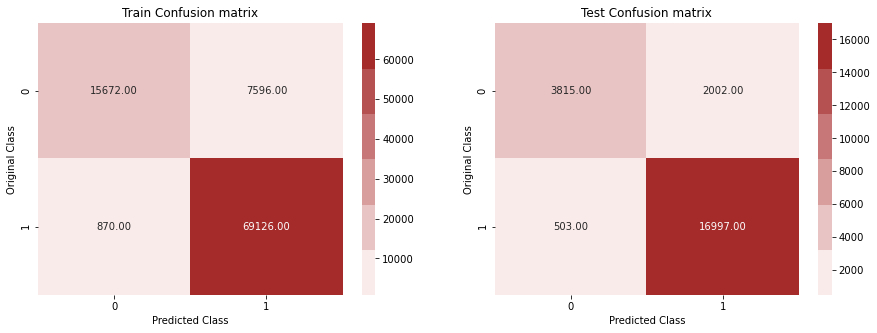

In [80]:
y_train_pred5 = lstm_model2.predict([X_train_padded_text, X_train_other_inp])
y_test_pred5 = lstm_model2.predict([X_test_padded_text, X_test_other_inp])
y_train_pred = np.greater(y_train_pred5,0.5).astype(int)
y_test_pred = np.greater(y_test_pred5,0.5).astype(int)

print(f1_score(y_train,y_train_pred))
confusion_matrices_plot(y_train,y_train_pred,y_test,y_test_pred)

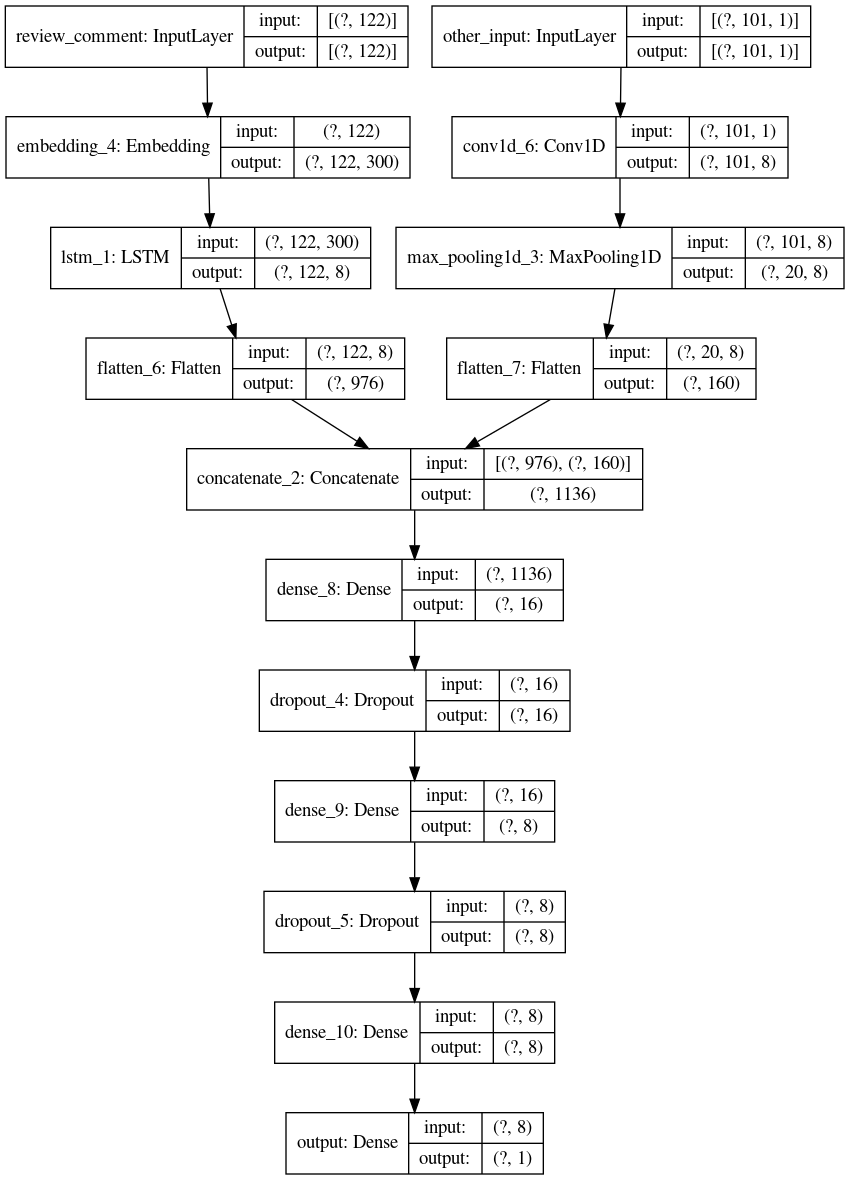

In [70]:
tf.keras.utils.plot_model(
    lstm_model2,
    to_file="models/lstm_model2.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96)

#### Ensemble on outputs of NN models

In [136]:
m1 = tf.keras.models.load_model('models/NN_model.h5',custom_objects={'f1':f1})
m2 = tf.keras.models.load_model('models/cnn_model1.h5',custom_objects={'f1':f1})
m3 = tf.keras.models.load_model('models/cnn_model2.h5',custom_objects={'f1':f1})
m4 = tf.keras.models.load_model('models/lstm_model1.h5',custom_objects={'f1':f1})
m5 = tf.keras.models.load_model('models/lstm_model2.h5',custom_objects={'f1':f1})
y_train_pred1 = m1.predict(X_train_merge.toarray())
y_train_pred2 = m2.predict(X_train_merge_inp)
y_train_pred3 = m3.predict([X_train_padded_text, X_train_other_inp])
y_train_pred4 = m4.predict([X_train_padded_text, training_os.toarray(), training_pc.toarray(),X_train])
y_train_pred5 = m5.predict([X_train_padded_text, X_train_other_inp])

y_test_pred1 = m1.predict(X_test_merge.toarray())
y_test_pred2 = m2.predict(X_test_merge_inp)
y_test_pred3 = m3.predict([X_test_padded_text, X_test_other_inp])
y_test_pred4 = m4.predict([X_test_padded_text, test_os.toarray(), test_pc.toarray(),X_test])
y_test_pred5 = m5.predict([X_test_padded_text, X_test_other_inp])

In [163]:
train_set = np.stack((y_train_pred1[:,0],y_train_pred2[:,0],y_train_pred3[:,0],y_train_pred4[:,0],y_train_pred5[:,0]),axis=-1)
test_set = np.stack((y_test_pred1[:,0],y_test_pred2[:,0],y_test_pred3[:,0],y_test_pred4[:,0],y_test_pred5[:,0]),axis=-1)
# clf = SGDClassifier(loss='hinge', alpha=0.01, n_jobs=-1)
clf = XGBClassifier(n_jobs=-1)
clf.fit(train_set,y_train)
pickle.dump(clf, open('models/NN_soft_stacking.pkl','wb'))

y_train_pred = clf.predict(train_set)
y_test_pred = clf.predict(test_set)
# printing train and test scores
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9328985567067047
Test f1 score 0.9209951019730469


In [161]:
train_set = np.stack((np.greater(y_train_pred1,0.5).astype(int)[:,0],np.greater(y_train_pred2,0.5).astype(int)[:,0],
                      np.greater(y_train_pred3,0.5).astype(int)[:,0],np.greater(y_train_pred4,0.5).astype(int)[:,0],
                      np.greater(y_train_pred5,0.5).astype(int)[:,0]),axis=-1)
test_set = np.stack((np.greater(y_test_pred1,0.5).astype(int)[:,0],np.greater(y_test_pred2,0.5).astype(int)[:,0],
                     np.greater(y_test_pred3,0.5).astype(int)[:,0],np.greater(y_test_pred4,0.5).astype(int)[:,0],
                     np.greater(y_test_pred5,0.5).astype(int)[:,0]),axis=-1)

# clf = SGDClassifier(loss='log', alpha=0.01, n_jobs=-1)
clf = XGBClassifier(n_jobs=-1)
clf.fit(train_set,y_train)
pickle.dump(clf, open('models/NN_hard_stacking.pkl','wb'))

y_train_pred = clf.predict(train_set)
y_test_pred = clf.predict(test_set)
# printing train and test scores
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9254049592461395
Test f1 score 0.9206939625260238


### Summary on NN Models:-

After training with ML models, I tried some neural networks models starting with simple NN models to Conv1D and LSTM models. I tried 6 different NN models as shown above. let us see these models one by one.

Being binary classification task, We tried dense layer with 1 unit and sigmoid activation as ouput layer for all the models. The binary cross-entropy is minimized during the training of the models while custom f1-score score is observed. Early stopping and reduce learning rate callbacks are used to keep the learning of the model in check while tensorboard callback is used to observe the gradients of the models.

1. The first model I tried is a 3-layered NN models with sigmoid activation as output. Multiple intializations, optimization and regularizations technique is used and the best performing model among them is kept. Also, tried using Randomised search for deciding learning rate, number of hidden layer and units for the first model. The best one have BN layer added between layers, he intialization and adam optimizer gave the best result with around 0.92 f1-score.

2. Secondly, we tried simple 3-layered conv1D model with maxpooling, batch normalization and many more. The model with conv1D with relu activation and glorot intialization and SGD with momentum optimizer performed the best.
3. In this model, we tried a different approach with CNNs, Here we passed the encoded text features and other features paralley through conv layers and then the output from them is concatenated and then passed through a dense layer and then finally throuhg the output layer. We found that this model is performing better than the previous model but we did not see any significant increase in the performance. so, we decided to train some LSTM models as they capture the sequence information more accurately.
4. For LSTM, first I tried simple LSTM model with 8 units a with all our encoded featurees as input but the result we got was worse than the simple NN model so we discarded that from the notebook and then tried two more different models which achived sone good results similar to the CNN models.
5. In the first model we fed each text feature, categorical feature and numerical features parrallely to the model and the output is concatenated and then passed through dense layer and then output is generated.
6. In second approach we passed only text features and other features parllely similar to second CNN model and the output is caoncatenated and passed through dense layer and then output is generated.

We tried parameters tuning for every model from multiple intialization, activation, regularization( dropout or BN) to optimizers. Only the best performing models with the best parameters is kept in the notebook. Like for second CNN model, th bes model have BN after each conv layer and optimizers as adam with each conv layer having relu activation and glorot intialization.
The results of each model can be compared from below summary table. The results achieved by the NNs are not better than our best result achieved by ensembles suggesting we need more training data for them to learn better.

|**MODELS**|**HYPERPARAMETERS**|**F1-SCORE**|
|------|--------|-------|
|Simple NN|units, layers, learning rate etc.|0.9258|
|CNN-1|units, layers, learning rate etc.|0.9229|
|CNN with two i/p|units, layers, learning rate etc.|0.9390|
|LSTM with multiple i/p|units, layers, learning rate etc.|0.9268|
|LSTM with 2 i/p|units, layers, learning rate etc.|0.9423|
|Custom Ensemble|models|0.9428|

### 7. Observation on Model Trainning:-

Now, that the analysis, feature engineering and pre-processing is done it is time to train models on the data and observe results to selct the best model among them. So, let us have a look at what we learned:-
* The categorical features are encoded using one-hot encoding technique and numerical ones are standarised using sklearn normalizer modules to reduce the effect of outliers.
* The text feature used for trainig is encoded using tfidf averaged word2vec technique.
* The data is divided as train and test into 80:20 split for training and validation of the models.
* Various classification models like LogisticRegression, DecisionTree, RandomForest and LightGBM are trained and results were observed.
* The f1-score is used as performance metric to compare the performance of the models.
* The models are fine-tuned using randomised search cross validation hyper-parameters tuning technique and finaaly trained on the best parameters obtained.
* Confusion matrix is used to better understand the predictions of the models.
* Feature importance is also measured to look at some of the top features of the data and find the reasoning behind models predictions.
* The non-linear models are found to be performing well. Among them, XGBoost performed best with 0.96 f1-score.
* The performance results for each model can be observed in the above summary table.
* Other ensemble techniques like Stacking and Voting as well as NN models are used to further improve the results and reduce the errors.
* Voting performed better than some techniques but could not beat the performance of XGBoost.
* The Stacking classifier gave best results with train score of 0.974 and test score of 0.939 as provided in the above summary table.
* The NN models performed better then some linear models but couldn't beat the performance achieved by the stacking classifer suggesting that we need more data for them to achieve score better than this.
* The ensemble technique applied on the ouputs of the NN's models showed some improvement in the results but could not achieve better than our previous best.